## <font color="yellow"> I.  Data Extraction and Cleansing</font>

### 0 - Non-BBG Data

In [270]:
#SiCheng main dataframe
import pandas as pd
import openpyxl

raw_df_sc = pd.read_excel('main_dataset_raw.xlsx',sheet_name='data')
raw_df_sc

,DATE,CPI,PPI,ETF_Ounces,10yInterest,DP_ratio,PE_ratio,Chinese_premium_discount,Indian_premium_discount,NASDAQ,SP500_price,SP500_volume,USD_index,VIX
0,1914-01,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1914-02,NaN,-1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1914-03,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1914-04,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1914-05,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,2024-08,7.934,-0.9,NaN,1.664190,1.33,27.55,-1.526427,5.831219,0.002809,NaN,NaN,-0.005923,-0.037692
1328,2024-09,7.398,-2.4,NaN,1.581581,1.31,28.07,-11.192383,-2.388517,0.011506,NaN,NaN,NaN,0.047405
1329,2024-10,7.923,-0.9,NaN,1.480148,1.28,NaN,-13.455145,0.537662,-0.002251,NaN,NaN,NaN,0.141243
1330,2024-11,8.417,0.1,NaN,1.958417,1.25,NaN,-16.183557,9.254420,0.026150,NaN,NaN,NaN,-0.234083


### 1 - Extract BBG Dataset

##### <font color= #90EE90>1.0: Read Excel</font>

In [271]:
#Alfred Dataset
#Main, GC2 data, Fed_Eff_Rate, PE; fix index and column labels

raw_df_al_main = pd.read_excel('bbg_gc_data.xlsx',sheet_name='Data')
raw_df_al_gc2 = pd.read_excel('bbg_gc_data.xlsx',sheet_name='GC2 COMB COMDTY',skiprows=6)
raw_df_al_fed_eff_rate = pd.read_excel('bbg_gc_data.xlsx',sheet_name='Fed_Eff_Rate',skiprows=5)
raw_df_al_pe = pd.read_excel('bbg_gc_data.xlsx',sheet_name='PE',skiprows=6)

#another file
raw_df_al_dp12 = pd.read_excel('data2.xlsx',sheet_name='DP_12M',skiprows=6)
raw_df_al_gdp_nom_yoy = pd.read_excel('data2.xlsx',sheet_name='GDP_Nom_YoY',skiprows=5) #quarterly
raw_df_al_gdp_real_qoq = pd.read_excel('data2.xlsx',sheet_name='GDP_Real_QoQ',skiprows=5) #quarterly
raw_df_al_cpi_yoy = pd.read_excel('data2.xlsx',sheet_name='CPI_YoY',skiprows=5) #monthly
raw_df_al_unemploy = pd.read_excel('data2.xlsx',sheet_name='US_Unemp',skiprows=5) #monthly
raw_df_al_consumer_conf = pd.read_excel('data2.xlsx',sheet_name='Cons_Conf',skiprows=5) #monthly
raw_df_al_real_int = pd.read_excel('data2.xlsx',sheet_name='US_RIR',skiprows=5) #monthly



#tidy up dataset
raw_df_al_list = [raw_df_al_main, 
                  raw_df_al_gc2, 
                  raw_df_al_fed_eff_rate, 
                  raw_df_al_pe,
                  raw_df_al_dp12,
                  raw_df_al_gdp_nom_yoy,
                  raw_df_al_gdp_real_qoq,
                  raw_df_al_unemploy,
                  raw_df_al_cpi_yoy,
                  raw_df_al_consumer_conf,
                  raw_df_al_real_int]

for df in raw_df_al_list:
    df.set_index(df.columns[0], inplace= True)

print(raw_df_al_gc2.columns)

raw_df_al_gc2.columns = ['GC2_PX_Last', 'GC2_OPEN_INT']
#raw_df_al_fed_eff_rate.columns = ['fed_eff_rate']
raw_df_al_pe.columns = ['PE_RATIO']

raw_df_al_pe = raw_df_al_pe.drop('2025-02-06')
raw_df_al_main = raw_df_al_main.drop('2025-02-06')
raw_df_al_dp12 = raw_df_al_dp12.drop(['2025-02-07','2025-02-06'])
raw_df_al_dp12 = raw_df_al_dp12.drop('PX_LAST', axis = 1)
raw_df_al_dp12


Index(['PX_LAST', 'OPEN_INT'], dtype='object')


,EQY_DVD_YLD_12M
Date,
2025-02-05,1.2402
2025-02-04,1.2446
2025-02-03,1.2536
2025-01-31,1.2438
2025-01-30,1.2368
...,...
1975-01-07,NaN
1975-01-06,NaN
1975-01-03,NaN


In [272]:
raw_df_al_risk_free_rate = pd.read_excel('risk_free_rate.xlsx',sheet_name='risk_free_rate')

raw_df_al_risk_free_rate.set_index('Dates',inplace=True)
raw_df_al_risk_free_rate = raw_df_al_risk_free_rate.rename(columns={"GB12 Govt": "US00012M Index"})
raw_df_al_risk_free_rate.index = pd.to_datetime(raw_df_al_risk_free_rate.index)
raw_df_al_risk_free_rate = raw_df_al_risk_free_rate.resample('M').mean()

raw_df_al_risk_free_rate

,US0001M Index,US0003M Index,US0006M Index,US00012M Index,SOFR30A Index,TSFR1M Index,TSFR3M Index,TSFR6M Index,TSFR12M Index,FEDL01 Index
Dates,,,,,,,,,,
1975-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.041739
1975-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.201000
1975-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.456190
1975-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.519091
1975-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.219545
...,...,...,...,...,...,...,...,...,...,...
2024-10-31,4.96018,4.85372,4.68213,4.200957,4.954541,4.768959,4.619360,4.408266,4.086912,4.830000
2024-11-30,4.96018,4.85372,4.68213,4.327571,4.773410,4.600914,4.514202,4.413464,4.253799,4.639524
2024-12-31,4.96018,4.85372,4.68213,4.226591,4.588991,4.401243,4.368102,4.294680,4.193468,4.477727


##### <font color= #90EE90>1.1 Modify Columns Names</font>

In [273]:
"""check dataframe"""
#raw_df_al_gc2
#raw_df_al_fed_eff_rate.index[0]
#raw_df_al_pe
#raw_df_al_main
# raw_df_al_dp12
print(raw_df_al_gdp_nom_yoy.columns[0])


# Create Column names
col_name_2 = {'D/P Ratio':raw_df_al_dp12,
            'GDP_Nominoal_YOY':raw_df_al_gdp_nom_yoy,
             'GDP_Real_QoQ':raw_df_al_gdp_real_qoq, 
             'CPI_YoY':raw_df_al_cpi_yoy, 
             'US_Unemp': raw_df_al_unemploy, 
             'Cons_Conf': raw_df_al_consumer_conf, 
             'US_RIR':raw_df_al_real_int,
             "Fed_Eff_Rate": raw_df_al_fed_eff_rate
             }


for key, value in col_name_2.items():
    value.rename(columns={value.columns[0]:key},inplace=True)

#raw_df_al_dp12
#print(raw_df_al_gdp_nom_yoy, raw_df_al_gdp_real_qoq, raw_df_al_cpi_yoy, raw_df_al_consumer_conf, raw_df_al_real_int,raw_df_al_unemploy)
raw_df_al_main

raw_df_al_main.columns

PX_LAST


Index(['GC1 COMB Comdty (USD)  (R1)', 'GC1 COMB Comdty (USD)_Open Interest',
       'OI_SMAVG (15)', 'GC1 COMB Comdty _Volume', 'Vol_SMAVG (15)',
       'SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'CPI YOY Index', 'PCE CYOY Index', 'VIX Index',
       'JPY Curncy', 'LEGATRUU Index', 'EMUSTRUU Index'],
      dtype='object')

##### <font color= #90EE90>1.2 Join More Tables and Set Index Time Starts from 1975</font>

In [274]:
bbg_df = raw_df_al_main.drop(raw_df_al_main.columns[2:5],axis=1)


join_list = [raw_df_al_gc2, raw_df_al_pe]

for key, value in col_name_2.items():
    join_list.append(value)


bbg_df = bbg_df.join(join_list, how='left')

threshold_date = pd.Timestamp('1975-01-01')
bbg_df = bbg_df[bbg_df.index > threshold_date]
mapping = {bbg_df.columns[0]:'GC1_PX_Last',bbg_df.columns[1]:'GC1_OPEN_INT'}
bbg_df.rename(columns=mapping, inplace=True)
col = bbg_df.pop('GC2_PX_Last')
bbg_df.insert(1,'GC2_PX_Last',col)
# Sort by index (ascending order)
bbg_df = bbg_df.sort_index(ascending=True)

print(bbg_df.columns)
bbg_df

raw_df_al_fed_eff_rate[raw_df_al_fed_eff_rate.index> "1975-01-01"]

Index(['GC1_PX_Last', 'GC2_PX_Last', 'GC1_OPEN_INT', 'SPX Index', 'NDX Index',
       'DXY Curncy', 'USGG10YR Index', 'USGG2YR Index', 'CPI YOY Index',
       'PCE CYOY Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'GC2_OPEN_INT', 'PE_RATIO', 'D/P Ratio',
       'GDP_Nominoal_YOY', 'GDP_Real_QoQ', 'CPI_YoY', 'US_Unemp', 'Cons_Conf',
       'US_RIR', 'Fed_Eff_Rate'],
      dtype='object')


,Fed_Eff_Rate
Date,
2025-02-05,4.33
2025-02-04,4.33
2025-02-03,4.33
2025-01-31,4.33
2025-01-30,4.33
...,...
1975-01-08,5.12
1975-01-07,7.30
1975-01-06,7.85


### 2 - Cleanse and Create Additional Data

##### 2.1 (Placeholder) Calculate volatility

In [275]:
import numpy as np
import pandas as pd

# Compute δ so that the sum of weights equals 60 days
delta = 60 / (60 + 1)  # δ = 60 / (60 + 1)

# Ensure Date is in datetime format and sorted
bbg_df.index = pd.to_datetime(bbg_df.index, format='%Y-%m-%d')
bbg_df = bbg_df.sort_index()

# Compute daily log returns for the first and second columns
log_returns = pd.DataFrame(index=bbg_df.index)
log_returns['GC1_log_return'] = np.log(bbg_df.iloc[:, 0] / bbg_df.iloc[:, 0].shift(1))
log_returns['GC2_log_return'] = np.log(bbg_df.iloc[:, 1] / bbg_df.iloc[:, 1].shift(1))

# Compute EWMA variance for GC1 and GC2 --> agreed approach
variance = pd.DataFrame(index=bbg_df.index)
variance['GC1_variance'] = log_returns['GC1_log_return'].ewm(span=(1/(1-delta)), adjust=False).var()
variance['GC2_variance'] = log_returns['GC2_log_return'].ewm(span=(1/(1-delta)), adjust=False).var()

# Mask variance before 60 days to NaN
variance.loc[:bbg_df.index[60], ['GC1_variance', 'GC2_variance']] = np.nan

# Compute annualized volatility (square root of variance * 261)
volatility = pd.DataFrame(index=bbg_df.index)
volatility['GC1_volatility'] = np.sqrt(261 * variance['GC1_variance'])
volatility['GC2_volatility'] = np.sqrt(261 * variance['GC2_variance'])

volatility.to_csv('volatility.csv')


##### **<font color= #90EE90>2.2 Fill Nan and Backfill Price Data</font>**

In [276]:
bbg_df = bbg_df.copy(deep=True)

print("Checking NaN in GC2 and GC1 before modification.......")
print(bbg_df[bbg_df['GC2_PX_Last'].isna()])


bbg_df['GC2_PX_Last'] = bbg_df['GC2_PX_Last'].fillna(method = 'ffill' )
bbg_df['GC1_PX_Last'] = bbg_df['GC1_PX_Last'].fillna(method = 'ffill' )

#checking
print("\nChecking any NaN left in GC2 .......")
print()
print(bbg_df[bbg_df['GC2_PX_Last'].isna()])

print("\nChecking any NaN left in GC1 .......")
print()
print(bbg_df[bbg_df['GC1_PX_Last'].isna()])

print("\nChecking 2025-01-01 .......")
print(bbg_df.loc['2025-01-01'])




Checking NaN in GC2 and GC1 before modification.......
            GC1_PX_Last  GC2_PX_Last  GC1_OPEN_INT  SPX Index  NDX Index  \
Date                                                                       
1975-02-12          NaN          NaN           NaN  79.919998        NaN   
1975-02-17          NaN          NaN           NaN        NaN        NaN   
1975-03-28          NaN          NaN           NaN        NaN        NaN   
1975-05-26          NaN          NaN           NaN        NaN        NaN   
1975-05-31          NaN          NaN           NaN        NaN        NaN   
...                 ...          ...           ...        ...        ...   
2024-11-28          NaN          NaN           NaN        NaN        NaN   
2024-11-30          NaN          NaN           NaN        NaN        NaN   
2024-12-25          NaN          NaN           NaN        NaN        NaN   
2025-01-01          NaN          NaN           NaN        NaN        NaN   
2025-01-20          NaN          

##### **<font color= #90EE90>2.3 Calculate Daily Gold Return and Daily Risk Free Rate </font>**

**Risk Free Rate**

In [277]:
raw_df_al_risk_free_rate.tail(60)

,US0001M Index,US0003M Index,US0006M Index,US00012M Index,SOFR30A Index,TSFR1M Index,TSFR3M Index,TSFR6M Index,TSFR12M Index,FEDL01 Index
Dates,,,,,,,,,,
2020-03-31,0.917231,1.102355,0.963826,0.319818,1.276407,0.409936,0.349609,0.290991,NaN,0.625455
2020-04-30,0.695701,1.103430,1.082349,0.173409,0.165599,0.051858,0.060563,0.061591,NaN,0.048636
2020-05-31,0.193931,0.403960,0.627193,0.155952,0.033111,0.056217,0.056232,0.052782,NaN,0.050000
2020-06-30,0.183014,0.310259,0.426445,0.172864,0.060486,0.080441,0.079045,0.074659,NaN,0.076818
2020-07-31,0.172226,0.267757,0.339307,0.141435,0.095323,0.087096,0.078717,0.069900,NaN,0.093478
2020-08-31,0.161925,0.252526,0.313140,0.124952,0.097448,0.079643,0.074890,0.071362,NaN,0.094762
2020-09-30,0.151804,0.236889,0.279263,0.122500,0.084974,0.077245,0.075973,0.072209,NaN,0.090000
2020-10-31,0.146081,0.221292,0.247331,0.123000,0.086488,0.077971,0.078767,0.074337,NaN,0.090000
2020-11-30,0.142187,0.220002,0.250251,0.111333,0.088988,0.083151,0.080767,0.076622,NaN,0.086667


In [278]:
#Placeholder only
#1-month risk free return accumulated from overnight LIBOR rate
def calculate_monthly_log_rf_ret(date_now,col):
    start_date = date_now - pd.DateOffset(months=1)
    mask = (col.index > start_date) & (col.index <= date_now)
    return col.loc[mask].sum()

In [279]:
#1 Month Risk Free Return Realized from past month
fed_overnight_rate = pd.DataFrame(raw_df_al_risk_free_rate['FEDL01 Index'])
fed_overnight_rate['daily_risk_free_ret'] = np.log(fed_overnight_rate['FEDL01 Index']/261 / 100 + 1) #assume 261 trading days

fed_overnight_rate['1M_risk_free_ret_realized'] = [
    calculate_monthly_log_rf_ret(date_now,fed_overnight_rate['daily_risk_free_ret'])
    for date_now in fed_overnight_rate.index]

fed_overnight_rate.loc['1975-01-01':'1975-01-30','1M_risk_free_ret_realized'] = np.nan

fed_overnight_rate.to_csv('fed_overnight_rate_df.csv')
fed_overnight_rate

,FEDL01 Index,daily_risk_free_ret,1M_risk_free_ret_realized
Dates,,,
1975-01-31,7.041739,0.000270,0.000270
1975-02-28,6.201000,0.000238,0.000507
1975-03-31,5.456190,0.000209,0.000209
1975-04-30,5.519091,0.000211,0.000420
1975-05-31,5.219545,0.000200,0.000200
...,...,...,...
2024-10-31,4.830000,0.000185,0.000185
2024-11-30,4.639524,0.000178,0.000363
2024-12-31,4.477727,0.000172,0.000172


**Calculate Return (not yet deduct risk free rate)**

In [280]:
#Create Daily Risk Free Return based on overnight LIBOR rate

Rf_Rate_1M = pd.DataFrame(raw_df_al_risk_free_rate['US0001M Index'])
Rf_Rate_1M.rename(columns = {'US0001M Index':'1M_Risk_Free_Rate'}, inplace=True)
nan_range = Rf_Rate_1M.index[Rf_Rate_1M.iloc[:,0].isna()]
print(nan_range)

fed_overnight_rate



DatetimeIndex(['1975-01-31', '1975-02-28', '1975-03-31', '1975-04-30',
               '1975-05-31', '1975-06-30', '1975-07-31', '1975-08-31',
               '1975-09-30', '1975-10-31',
               ...
               '1984-02-29', '1984-03-31', '1984-04-30', '1984-05-31',
               '1984-06-30', '1984-07-31', '1984-08-31', '1984-09-30',
               '1984-10-31', '1984-11-30'],
              dtype='datetime64[ns]', name='Dates', length=119, freq='ME')


,FEDL01 Index,daily_risk_free_ret,1M_risk_free_ret_realized
Dates,,,
1975-01-31,7.041739,0.000270,0.000270
1975-02-28,6.201000,0.000238,0.000507
1975-03-31,5.456190,0.000209,0.000209
1975-04-30,5.519091,0.000211,0.000420
1975-05-31,5.219545,0.000200,0.000200
...,...,...,...
2024-10-31,4.830000,0.000185,0.000185
2024-11-30,4.639524,0.000178,0.000363
2024-12-31,4.477727,0.000172,0.000172


In [281]:
# Define the columns to keep with original values
keep_columns = [
    "CPI YOY Index", "PCE CYOY Index", "GDP_Nominoal_YOY", "GDP_Real_QoQ",
    "CPI_YoY", "US_Unemp", "Cons_Conf", "US_RIR", 
]


# Calculate log returns for all columns except those in keep_columns
log_return_df = np.log(bbg_df.drop(columns=keep_columns, errors='ignore')).diff()


# Combine the original values of the specified columns with the log returns of the remaining columns
bbg_df_log_rets = pd.concat([log_return_df,bbg_df[keep_columns]], axis=1)
bbg_df_log_rets = bbg_df_log_rets.iloc[1:]
bbg_df_log_rets = bbg_df_log_rets.rename(columns={'GC1_PX_Last': 'GC1_Monthly_raw_Return','GC2_PX_Last': 'GC2_Monthly_raw_Return'}) #Update column name first, although up to this point is still daily data
bbg_df_log_rets


,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_OPEN_INT,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,...,D/P Ratio,Fed_Eff_Rate,CPI YOY Index,PCE CYOY Index,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-03,-0.002287,-0.003936,NaN,0.006811,NaN,-0.005542,0.001346,NaN,NaN,0.000599,...,NaN,-0.021277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-06,-0.001719,-0.003951,NaN,0.005078,NaN,-0.005676,-0.005397,NaN,NaN,0.000598,...,NaN,-0.064140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-07,-0.005750,-0.005672,NaN,-0.000704,NaN,0.000207,-0.001354,NaN,NaN,-0.000299,...,NaN,-0.072639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-08,0.022806,0.025830,NaN,-0.013895,NaN,0.005161,0.001354,NaN,NaN,-0.000598,...,NaN,-0.354720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-09,0.005061,0.002768,NaN,0.016005,NaN,-0.002061,-0.005426,NaN,NaN,0.000299,...,NaN,0.350602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-30,0.019025,0.018338,-0.270892,0.005262,0.004504,-0.001881,-0.002676,-0.001473,-0.044452,-0.006010,...,-0.005483,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-31,-0.003726,-0.003591,-0.690890,-0.005060,-0.001399,0.005301,0.004948,-0.002427,0.036571,0.005816,...,0.005644,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,71.1,1.4869
2025-02-03,0.007580,0.007765,-0.400028,-0.007638,-0.008438,0.005705,0.003585,0.012266,0.125127,-0.002969,...,0.007848,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### **<font color= #90EE90>2.4 Resample to Monthly Data</font>**

**Resampling**

In [282]:
#when resampling, sum up the return in months to get monthly_ret (from 1st day to last day of month)
bbg_df_monthly_only = bbg_df_log_rets.resample('M').sum(min_count=1)
bbg_df_monthly_only = bbg_df_monthly_only.loc[:"2024-12-31"] #until 2024-12-31


# Compute monthly mean volatility (AC: agreed approach: monthly mean of the annualized vol)
volatility_monthly = volatility.resample('M').mean()

# Merge with bbg_df_monthly_only, keeping all indices from bbg_df_monthly_only
bbg_df_monthly_only = bbg_df_monthly_only.merge(volatility_monthly, how='left', left_index=True, right_index=True)


#Include Risk-Free Rate Return
bbg_df_monthly_only  = bbg_df_monthly_only .join(fed_overnight_rate['1M_risk_free_ret_realized'],how='left')
bbg_df_monthly_only['1M_risk_free_ret_realized'].fillna(method = 'ffill' , inplace= True )

bbg_df_monthly_only


,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_OPEN_INT,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,...,PCE CYOY Index,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,GC1_volatility,GC2_volatility,1M_risk_free_ret_realized
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,NaN,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,...,10.14168,NaN,NaN,11.8,8.1,NaN,-4.8026,NaN,NaN,0.000270
1975-02-28,0.041847,0.043425,NaN,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,...,10.21999,NaN,NaN,11.2,8.1,NaN,-5.2288,NaN,NaN,0.000507
1975-03-31,-0.032772,-0.035034,NaN,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,...,9.93721,8.4,-4.7,10.3,8.6,NaN,-4.7510,0.162229,0.161182,0.000209
1975-04-30,-0.059919,-0.060868,NaN,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,...,9.65292,NaN,NaN,10.2,8.8,NaN,-4.9583,0.171430,0.172165,0.000420
1975-05-31,-0.001800,0.000592,NaN,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,...,9.07047,NaN,NaN,9.5,9.0,NaN,-4.2150,0.176185,0.181025,0.000200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,1.334165,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,...,2.73112,NaN,NaN,2.5,4.2,67.9,2.8443,0.168238,0.169387,0.000204
2024-09-30,0.051211,0.050830,-2.773346,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,...,2.66078,5.0,3.1,2.4,4.1,70.1,2.4344,0.151431,0.154221,0.000401
2024-10-31,0.042046,0.042190,5.034246,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,...,2.80366,NaN,NaN,2.6,4.1,70.5,2.2771,0.134111,0.135932,0.000185


**Subtract Monthly Return with Risk-Free Return**

In [283]:
bbg_df_monthly_only['GC1_Monthly_Excess_Return'] = bbg_df_monthly_only['GC1_Monthly_raw_Return'] - bbg_df_monthly_only['1M_risk_free_ret_realized']
bbg_df_monthly_only['GC2_Monthly_Excess_Return'] = bbg_df_monthly_only['GC1_Monthly_raw_Return'] - bbg_df_monthly_only['1M_risk_free_ret_realized']

bbg_df_monthly_only

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_OPEN_INT,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,...,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,GC1_volatility,GC2_volatility,1M_risk_free_ret_realized,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,NaN,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,...,NaN,11.8,8.1,NaN,-4.8026,NaN,NaN,0.000270,0.002012,0.002012
1975-02-28,0.041847,0.043425,NaN,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,...,NaN,11.2,8.1,NaN,-5.2288,NaN,NaN,0.000507,0.041340,0.041340
1975-03-31,-0.032772,-0.035034,NaN,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,...,-4.7,10.3,8.6,NaN,-4.7510,0.162229,0.161182,0.000209,-0.032981,-0.032981
1975-04-30,-0.059919,-0.060868,NaN,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,...,NaN,10.2,8.8,NaN,-4.9583,0.171430,0.172165,0.000420,-0.060340,-0.060340
1975-05-31,-0.001800,0.000592,NaN,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,...,NaN,9.5,9.0,NaN,-4.2150,0.176185,0.181025,0.000200,-0.002000,-0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,1.334165,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,...,NaN,2.5,4.2,67.9,2.8443,0.168238,0.169387,0.000204,0.031435,0.031435
2024-09-30,0.051211,0.050830,-2.773346,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,...,3.1,2.4,4.1,70.1,2.4344,0.151431,0.154221,0.000401,0.050810,0.050810
2024-10-31,0.042046,0.042190,5.034246,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,...,NaN,2.6,4.1,70.5,2.2771,0.134111,0.135932,0.000185,0.041861,0.041861


##### **<font color= #90EE90>2.5 Create Time Series Momentum Data</font>**

**Calculate Realized Return and Sign**

In [284]:
#1M Return
bbg_df_monthly_only['GC1_1M_Ret'] = bbg_df_monthly_only['GC1_Monthly_Excess_Return']
bbg_df_monthly_only['GC2_1M_Ret'] = bbg_df_monthly_only['GC2_Monthly_Excess_Return']

# 1M sign
bbg_df_monthly_only['GC1_1M_Sign'] = np.sign(bbg_df_monthly_only['GC1_Monthly_Excess_Return'])
bbg_df_monthly_only['GC2_1M_Sign'] = np.sign(bbg_df_monthly_only['GC2_Monthly_Excess_Return'])

#--------------------

# 3M return (log return accumulates by summation)
bbg_df_monthly_only['GC1_3M_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=3)
    .sum()
)

bbg_df_monthly_only['GC2_3M_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=3)
    .sum()
)

# Calculate 3M sign
bbg_df_monthly_only['GC1_3M_Sign'] = np.sign(bbg_df_monthly_only['GC1_3M_Ret'])
bbg_df_monthly_only['GC2_3M_Sign'] = np.sign(bbg_df_monthly_only['GC2_3M_Ret'])

#--------------------

# 6M return (log return accumulates by summation)
bbg_df_monthly_only['GC1_6M_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=6)
    .sum()
)
bbg_df_monthly_only['GC2_6M_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=6)
    .sum()
)
# Calculate 6M sign
bbg_df_monthly_only['GC1_6M_Sign'] = np.sign(bbg_df_monthly_only['GC1_6M_Ret'])
bbg_df_monthly_only['GC2_6M_Sign'] = np.sign(bbg_df_monthly_only['GC2_6M_Ret'])

#--------------------

# 12M return (log return accumulates by summation)
bbg_df_monthly_only['GC1_12M_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=12)
    .sum()
)
bbg_df_monthly_only['GC2_12M_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=12)
    .sum()
)


# Calculate 12M sign
bbg_df_monthly_only['GC1_12M_Sign'] = np.sign(bbg_df_monthly_only['GC1_12M_Ret'])
bbg_df_monthly_only['GC2_12M_Sign'] = np.sign(bbg_df_monthly_only['GC2_12M_Ret'])


#checking log return
bbg_df_monthly_only[['GC2_Monthly_Excess_Return','GC2_12M_Ret','GC2_6M_Ret','GC2_3M_Ret']].head(24)
#bbg_df_monthly_only


,GC2_Monthly_Excess_Return,GC2_12M_Ret,GC2_6M_Ret,GC2_3M_Ret
Date,,,,
1975-01-31,0.002012,NaN,NaN,NaN
1975-02-28,0.041340,NaN,NaN,NaN
1975-03-31,-0.032981,NaN,NaN,0.010371
1975-04-30,-0.060340,NaN,NaN,-0.051980
1975-05-31,-0.002000,NaN,NaN,-0.095320
1975-06-30,0.007366,NaN,-0.044603,-0.054974
1975-07-31,-0.001426,NaN,-0.048041,0.003940
1975-08-31,-0.045392,NaN,-0.134772,-0.039452
1975-09-30,-0.131689,NaN,-0.233480,-0.178506


**Forward Return and Sign**

In [285]:
# ===== Calculate Actual Return in Forward-Looking Style : Next X Month Return =====

# 1M Fwd return
bbg_df_monthly_only['GC1_1M_Fwd_Ret'] = bbg_df_monthly_only['GC1_Monthly_Excess_Return'].shift(-1)
bbg_df_monthly_only['GC2_1M_Fwd_Ret'] = bbg_df_monthly_only['GC2_Monthly_Excess_Return'].shift(-1)

# 1M Sign
bbg_df_monthly_only['GC1_1M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_1M_Fwd_Ret'])
bbg_df_monthly_only['GC2_1M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_1M_Fwd_Ret'])

#--------------------

# Forward-looking 3M return
bbg_df_monthly_only['GC1_3M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=3)
    .sum()
    .shift(-2)
)
bbg_df_monthly_only['GC2_3M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=3)
    .sum()
    .shift(-2)  # forward-looking return
)
# # Forward-looking 3M return
# bbg_df_monthly_only['GC1_3M_Fwd_raw_Ret'] = (
#     bbg_df_monthly_only['GC1_Monthly_raw_Return']
#     .rolling(window=3)
#     .sum()
#     .shift(-2)
# )
# bbg_df_monthly_only['GC2_3M_Fwd_raw_Ret'] = (
#     bbg_df_monthly_only['GC2_Monthly_raw_Return']
#     .rolling(window=3)
#     .sum()
#     .shift(-2)  # forward-looking return
# )

# 3M forward sign
bbg_df_monthly_only['GC1_3M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_3M_Fwd_Ret'])
bbg_df_monthly_only['GC2_3M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_3M_Fwd_Ret'])

#--------------------

# Forward-looking 6M return
bbg_df_monthly_only['GC1_6M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=6)
    .sum()
    .shift(-5)
)
bbg_df_monthly_only['GC2_6M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=6)
    .sum()
    .shift(-5)
)

# # Forward-looking 6M return
# bbg_df_monthly_only['GC1_6M_Fwd_raw_Ret'] = (
#     bbg_df_monthly_only['GC1_Monthly_raw_Return']
#     .rolling(window=6)
#     .sum()
#     .shift(-5)
# )
# bbg_df_monthly_only['GC2_6M_Fwd_raw_Ret'] = (
#     bbg_df_monthly_only['GC2_Monthly_raw_Return']
#     .rolling(window=6)
#     .sum()
#     .shift(-5)
# )

# 6M forward sign
bbg_df_monthly_only['GC1_6M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_6M_Fwd_Ret'])
bbg_df_monthly_only['GC2_6M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_6M_Fwd_Ret'])

#--------------------

# Forward-looking 12M return
bbg_df_monthly_only['GC1_12M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC1_Monthly_Excess_Return']
    .rolling(window=12)
    .sum()
    .shift(-11)
)
bbg_df_monthly_only['GC2_12M_Fwd_Ret'] = (
    bbg_df_monthly_only['GC2_Monthly_Excess_Return']
    .rolling(window=12)
    .sum()
    .shift(-11)
)

# # Forward-looking 12M return
# bbg_df_monthly_only['GC1_12M_Fwd_raw_Ret'] = (
#     bbg_df_monthly_only['GC1_Monthly_raw_Return']
#     .rolling(window=12)
#     .sum()
#     .shift(-11)
# )
# bbg_df_monthly_only['GC2_12M_Fwd_raw_Ret'] = (
#     bbg_df_monthly_only['GC2_Monthly_raw_Return']
#     .rolling(window=12)
#     .sum()
#     .shift(-11)
# )

# 12M forward sign
bbg_df_monthly_only['GC1_12M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC1_12M_Fwd_Ret'])
bbg_df_monthly_only['GC2_12M_Fwd_Sign'] = np.sign(bbg_df_monthly_only['GC2_12M_Fwd_Ret'])

#--------------------
bbg_df_monthly_only[['GC1_3M_Fwd_Ret','GC1_3M_Ret','GC1_12M_Fwd_Ret','GC1_12M_Ret']].head(20)


,GC1_3M_Fwd_Ret,GC1_3M_Ret,GC1_12M_Fwd_Ret,GC1_12M_Ret
Date,,,,
1975-01-31,0.010371,NaN,-0.220399,NaN
1975-02-28,-0.051980,NaN,-0.317765,NaN
1975-03-31,-0.095320,0.010371,-0.325728,NaN
1975-04-30,-0.054974,-0.051980,-0.319683,NaN
1975-05-31,0.003940,-0.095320,-0.261264,NaN
1975-06-30,-0.039452,-0.054974,-0.282222,NaN
1975-07-31,-0.178506,0.003940,-0.306807,NaN
1975-08-31,-0.161066,-0.039452,-0.405668,NaN
1975-09-30,-0.155371,-0.178506,-0.447085,NaN


**Lag_1 Return and Sign**

In [286]:
bbg_df_monthly_only.drop(['GC1_OPEN_INT','GC2_OPEN_INT'],axis=1, inplace = True)

In [287]:
lag_1_col_gc = ['GC1_3M_Ret','GC2_3M_Ret','GC1_6M_Ret','GC2_6M_Ret','GC1_12M_Ret','GC2_12M_Ret',
                'GC1_3M_Sign','GC2_3M_Sign','GC1_6M_Sign','GC2_6M_Sign','GC1_12M_Sign','GC2_12M_Sign']

for col in lag_1_col_gc:
    bbg_df_monthly_only[col+'_lag_1']=bbg_df_monthly_only[col].shift(1)

lag_col_name = [col+'_lag_1' for col in lag_1_col_gc]

bbg_df_monthly_only.to_excel("bbg_df_monthly_only_20250216.xlsx")
bbg_df_monthly_only

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,...,GC1_6M_Ret_lag_1,GC2_6M_Ret_lag_1,GC1_12M_Ret_lag_1,GC2_12M_Ret_lag_1,GC1_3M_Sign_lag_1,GC2_3M_Sign_lag_1,GC1_6M_Sign_lag_1,GC2_6M_Sign_lag_1,GC1_12M_Sign_lag_1,GC2_12M_Sign_lag_1
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-28,0.041847,0.043425,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-03-31,-0.032772,-0.035034,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-04-30,-0.059919,-0.060868,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
1975-05-31,-0.001800,0.000592,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,NaN,...,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,...,0.167553,0.167553,0.204691,0.204691,1.0,1.0,1.0,1.0,1.0,1.0
2024-09-30,0.051211,0.050830,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,...,0.196326,0.196326,0.248328,0.248328,1.0,1.0,1.0,1.0,1.0,1.0
2024-10-31,0.042046,0.042190,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,-0.034094,...,0.171135,0.171135,0.351679,0.351679,1.0,1.0,1.0,1.0,1.0,1.0


**Checking**

In [288]:
#checking Next X month Return
bbg_df_monthly_only[['GC2_12M_Fwd_Ret','GC2_Monthly_Excess_Return']].head(24)

,GC2_12M_Fwd_Ret,GC2_Monthly_Excess_Return
Date,,
1975-01-31,-0.220399,0.002012
1975-02-28,-0.317765,0.041340
1975-03-31,-0.325728,-0.032981
1975-04-30,-0.319683,-0.060340
1975-05-31,-0.261264,-0.002000
1975-06-30,-0.282222,0.007366
1975-07-31,-0.306807,-0.001426
1975-08-31,-0.405668,-0.045392
1975-09-30,-0.447085,-0.131689


**Reorder Columns**

In [289]:
#Reorder columns

new_order_part1 = list(bbg_df_monthly_only.columns[0:2]) + [
    'GC1_Monthly_Excess_Return', 'GC2_Monthly_Excess_Return',
    'GC1_volatility', 'GC2_volatility', 'GC2_1M_Ret', 'GC1_1M_Ret',
    'GC2_1M_Sign', 'GC1_1M_Sign', 'GC2_3M_Ret', 'GC1_3M_Ret',
    'GC2_3M_Sign', 'GC1_3M_Sign', 'GC2_6M_Ret', 'GC1_6M_Ret',
    'GC2_6M_Sign', 'GC1_6M_Sign', 'GC2_12M_Ret', 'GC1_12M_Ret',
    'GC2_12M_Sign', 'GC1_12M_Sign',
] + lag_col_name + ['GC1_1M_Fwd_Ret', 'GC2_1M_Fwd_Ret', 'GC1_1M_Fwd_Sign',
       'GC2_1M_Fwd_Sign']

new_forward_looking_cols = [
    'GC2_3M_Fwd_Ret', 'GC1_3M_Fwd_Ret', 'GC2_3M_Fwd_Sign', 'GC1_3M_Fwd_Sign',
    'GC2_6M_Fwd_Ret', 'GC1_6M_Fwd_Ret', 'GC2_6M_Fwd_Sign', 'GC1_6M_Fwd_Sign',
    'GC2_12M_Fwd_Ret', 'GC1_12M_Fwd_Ret', 'GC2_12M_Fwd_Sign', 'GC1_12M_Fwd_Sign'
]
# Create new column variants by adding a "_raw" version for each column
new_forward_looking_cols_with_ = new_forward_looking_cols + [col.replace("_Fwd_", "_Fwd_raw_") for col in new_forward_looking_cols]

final_column_order = new_order_part1 + new_forward_looking_cols

new_order = final_column_order + [col for col in bbg_df_monthly_only.columns if col not in final_column_order]
bbg_df_by_month = bbg_df_monthly_only.loc[:,new_order]
bbg_df_by_month

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return,GC1_volatility,GC2_volatility,GC2_1M_Ret,GC1_1M_Ret,GC2_1M_Sign,GC1_1M_Sign,...,Fed_Eff_Rate,CPI YOY Index,PCE CYOY Index,GDP_Nominoal_YOY,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,1M_risk_free_ret_realized
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,0.002012,0.002012,NaN,NaN,0.002012,0.002012,1.0,1.0,...,-0.234908,11.8,10.14168,NaN,NaN,11.8,8.1,NaN,-4.8026,0.000270
1975-02-28,0.041847,0.043425,0.041340,0.041340,NaN,NaN,0.041340,0.041340,1.0,1.0,...,-0.107664,11.2,10.21999,NaN,NaN,11.2,8.1,NaN,-5.2288,0.000507
1975-03-31,-0.032772,-0.035034,-0.032981,-0.032981,0.162229,0.161182,-0.032981,-0.032981,-1.0,-1.0,...,-0.118813,10.3,9.93721,8.4,-4.7,10.3,8.6,NaN,-4.7510,0.000209
1975-04-30,-0.059919,-0.060868,-0.060340,-0.060340,0.171430,0.172165,-0.060340,-0.060340,-1.0,-1.0,...,0.265641,10.2,9.65292,NaN,NaN,10.2,8.8,NaN,-4.9583,0.000420
1975-05-31,-0.001800,0.000592,-0.002000,-0.002000,0.176185,0.181025,-0.002000,-0.002000,-1.0,-1.0,...,-0.295775,9.5,9.07047,NaN,NaN,9.5,9.0,NaN,-4.2150,0.000200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.031435,0.031435,0.168238,0.169387,0.031435,0.031435,1.0,1.0,...,0.000000,2.5,2.73112,NaN,NaN,2.5,4.2,67.9,2.8443,0.000204
2024-09-30,0.051211,0.050830,0.050810,0.050810,0.151431,0.154221,0.050810,0.050810,1.0,1.0,...,-0.098505,2.4,2.66078,5.0,3.1,2.4,4.1,70.1,2.4344,0.000401
2024-10-31,0.042046,0.042190,0.041861,0.041861,0.134111,0.135932,0.041861,0.041861,1.0,1.0,...,0.000000,2.6,2.80366,NaN,NaN,2.6,4.1,70.5,2.2771,0.000185


##### **<font color= #90EE90>2.6 Modify Non-BBG Dataset</font>**

In [290]:
#Before change
#print(raw_df_sc.iloc[:,0])

#After change
raw_df_sc['DATE'] = pd.to_datetime(raw_df_sc['DATE'], format='%Y-%m') + pd.offsets.MonthEnd(0)

raw_df_sc.set_index(raw_df_sc.columns[0],inplace = True)

raw_df_sc

,CPI,PPI,ETF_Ounces,10yInterest,DP_ratio,PE_ratio,Chinese_premium_discount,Indian_premium_discount,NASDAQ,SP500_price,SP500_volume,USD_index,VIX
DATE,,,,,,,,,,,,,
1914-01-31,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-02-28,NaN,-1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-03-31,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-04-30,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914-05-31,NaN,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,7.934,-0.9,NaN,1.664190,1.33,27.55,-1.526427,5.831219,0.002809,NaN,NaN,-0.005923,-0.037692
2024-09-30,7.398,-2.4,NaN,1.581581,1.31,28.07,-11.192383,-2.388517,0.011506,NaN,NaN,NaN,0.047405
2024-10-31,7.923,-0.9,NaN,1.480148,1.28,NaN,-13.455145,0.537662,-0.002251,NaN,NaN,NaN,0.141243


In [291]:
#Join with BBG Dataframe

selected_cols = ['ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount', 'PPI']

partial_df_sc = raw_df_sc[selected_cols]

print(partial_df_sc)
partial_df_sc.index

            ETF_Ounces  Chinese_premium_discount  Indian_premium_discount  PPI
DATE                                                                          
1914-01-31         NaN                       NaN                      NaN -2.5
1914-02-28         NaN                       NaN                      NaN -1.7
1914-03-31         NaN                       NaN                      NaN -2.5
1914-04-30         NaN                       NaN                      NaN -2.5
1914-05-31         NaN                       NaN                      NaN -2.5
...                ...                       ...                      ...  ...
2024-08-31         NaN                 -1.526427                 5.831219 -0.9
2024-09-30         NaN                -11.192383                -2.388517 -2.4
2024-10-31         NaN                -13.455145                 0.537662 -0.9
2024-11-30         NaN                -16.183557                 9.254420  0.1
2024-12-31         NaN                 -3.335864    

DatetimeIndex(['1914-01-31', '1914-02-28', '1914-03-31', '1914-04-30',
               '1914-05-31', '1914-06-30', '1914-07-31', '1914-08-31',
               '1914-09-30', '1914-10-31',
               ...
               '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', name='DATE', length=1332, freq=None)

In [292]:
combined_df_by_month = bbg_df_by_month.join(partial_df_sc,how='left')
combined_df_by_month.index=pd.to_datetime(combined_df_by_month.index, format='%Y-%m')
combined_df_by_month['GDP_Nominoal_YOY'] = combined_df_by_month['GDP_Nominoal_YOY'].fillna(method = 'ffill')
combined_df_by_month['GDP_Real_QoQ'] = combined_df_by_month['GDP_Real_QoQ'].fillna(method = 'ffill')
combined_df_by_month

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return,GC1_volatility,GC2_volatility,GC2_1M_Ret,GC1_1M_Ret,GC2_1M_Sign,GC1_1M_Sign,...,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,1M_risk_free_ret_realized,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,0.002012,0.002012,NaN,NaN,0.002012,0.002012,1.0,1.0,...,NaN,11.8,8.1,NaN,-4.8026,0.000270,NaN,NaN,NaN,17.1
1975-02-28,0.041847,0.043425,0.041340,0.041340,NaN,NaN,0.041340,0.041340,1.0,1.0,...,NaN,11.2,8.1,NaN,-5.2288,0.000507,NaN,NaN,NaN,14.4
1975-03-31,-0.032772,-0.035034,-0.032981,-0.032981,0.162229,0.161182,-0.032981,-0.032981,-1.0,-1.0,...,-4.7,10.3,8.6,NaN,-4.7510,0.000209,NaN,NaN,NaN,12.5
1975-04-30,-0.059919,-0.060868,-0.060340,-0.060340,0.171430,0.172165,-0.060340,-0.060340,-1.0,-1.0,...,-4.7,10.2,8.8,NaN,-4.9583,0.000420,NaN,NaN,NaN,12.7
1975-05-31,-0.001800,0.000592,-0.002000,-0.002000,0.176185,0.181025,-0.002000,-0.002000,-1.0,-1.0,...,-4.7,9.5,9.0,NaN,-4.2150,0.000200,NaN,NaN,NaN,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.031435,0.031435,0.168238,0.169387,0.031435,0.031435,1.0,1.0,...,3.0,2.5,4.2,67.9,2.8443,0.000204,NaN,-1.526427,5.831219,-0.9
2024-09-30,0.051211,0.050830,0.050810,0.050810,0.151431,0.154221,0.050810,0.050810,1.0,1.0,...,3.1,2.4,4.1,70.1,2.4344,0.000401,NaN,-11.192383,-2.388517,-2.4
2024-10-31,0.042046,0.042190,0.041861,0.041861,0.134111,0.135932,0.041861,0.041861,1.0,1.0,...,3.1,2.6,4.1,70.5,2.2771,0.000185,NaN,-13.455145,0.537662,-0.9


##### **<font color= #90EE90>2.7 Export Dataframe for Review</font>**

In [293]:
combined_df_by_month.to_excel('combined_df_by_month_20250216.xlsx')

combined_df_by_month

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return,GC1_volatility,GC2_volatility,GC2_1M_Ret,GC1_1M_Ret,GC2_1M_Sign,GC1_1M_Sign,...,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,1M_risk_free_ret_realized,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,0.002012,0.002012,NaN,NaN,0.002012,0.002012,1.0,1.0,...,NaN,11.8,8.1,NaN,-4.8026,0.000270,NaN,NaN,NaN,17.1
1975-02-28,0.041847,0.043425,0.041340,0.041340,NaN,NaN,0.041340,0.041340,1.0,1.0,...,NaN,11.2,8.1,NaN,-5.2288,0.000507,NaN,NaN,NaN,14.4
1975-03-31,-0.032772,-0.035034,-0.032981,-0.032981,0.162229,0.161182,-0.032981,-0.032981,-1.0,-1.0,...,-4.7,10.3,8.6,NaN,-4.7510,0.000209,NaN,NaN,NaN,12.5
1975-04-30,-0.059919,-0.060868,-0.060340,-0.060340,0.171430,0.172165,-0.060340,-0.060340,-1.0,-1.0,...,-4.7,10.2,8.8,NaN,-4.9583,0.000420,NaN,NaN,NaN,12.7
1975-05-31,-0.001800,0.000592,-0.002000,-0.002000,0.176185,0.181025,-0.002000,-0.002000,-1.0,-1.0,...,-4.7,9.5,9.0,NaN,-4.2150,0.000200,NaN,NaN,NaN,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.031435,0.031435,0.168238,0.169387,0.031435,0.031435,1.0,1.0,...,3.0,2.5,4.2,67.9,2.8443,0.000204,NaN,-1.526427,5.831219,-0.9
2024-09-30,0.051211,0.050830,0.050810,0.050810,0.151431,0.154221,0.050810,0.050810,1.0,1.0,...,3.1,2.4,4.1,70.1,2.4344,0.000401,NaN,-11.192383,-2.388517,-2.4
2024-10-31,0.042046,0.042190,0.041861,0.041861,0.134111,0.135932,0.041861,0.041861,1.0,1.0,...,3.1,2.6,4.1,70.5,2.2771,0.000185,NaN,-13.455145,0.537662,-0.9


### __________________________________________________________________________________

## <font color="yellow"> II.  Build Training Model</font>

### 3 - Define X and Y Dataframe

##### **<font color= #90EE90>3.1   X1: Macro Factors </font>**

In [294]:
x_variables_data = combined_df_by_month.loc[:,'SPX Index':]
x_variables_data

,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index,PE_RATIO,...,GDP_Real_QoQ,CPI_YoY,US_Unemp,Cons_Conf,US_RIR,1M_risk_free_ret_realized,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.091770,NaN,-0.021726,0.014712,NaN,NaN,-0.008987,NaN,NaN,NaN,...,NaN,11.8,8.1,NaN,-4.8026,0.000270,NaN,NaN,NaN,17.1
1975-02-28,0.065179,NaN,-0.019899,-0.002461,NaN,NaN,-0.039429,NaN,NaN,NaN,...,NaN,11.2,8.1,NaN,-5.2288,0.000507,NaN,NaN,NaN,14.4
1975-03-31,0.027323,NaN,0.019908,0.079816,NaN,NaN,0.026118,NaN,NaN,NaN,...,-4.7,10.3,8.6,NaN,-4.7510,0.000209,NaN,NaN,NaN,12.5
1975-04-30,0.046182,NaN,0.005993,0.036760,NaN,NaN,-0.006141,NaN,NaN,NaN,...,-4.7,10.2,8.8,NaN,-4.9583,0.000420,NaN,NaN,NaN,12.7
1975-05-31,0.045809,NaN,-0.007999,-0.028024,NaN,NaN,-0.002330,NaN,NaN,NaN,...,-4.7,9.5,9.0,NaN,-4.2150,0.000200,NaN,NaN,NaN,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,0.020764,-0.002492,...,3.0,2.5,4.2,67.9,2.8443,0.000204,NaN,-1.526427,5.831219,-0.9
2024-09-30,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,0.017462,0.021356,...,3.1,2.4,4.1,70.1,2.4344,0.000401,NaN,-11.192383,-2.388517,-2.4
2024-10-31,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,-0.034094,-0.013816,-0.009846,...,3.1,2.6,4.1,70.5,2.2771,0.000185,NaN,-13.455145,0.537662,-0.9


In [295]:
#Remove unnecessary/ duplicated macro factors
x_variables_data.drop(['CPI_YoY'],axis=1,inplace= True)

x_variables_data.columns

Index(['SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'PE_RATIO', 'D/P Ratio', 'Fed_Eff_Rate',
       'CPI YOY Index', 'PCE CYOY Index', 'GDP_Nominoal_YOY', 'GDP_Real_QoQ',
       'US_Unemp', 'Cons_Conf', 'US_RIR', '1M_risk_free_ret_realized',
       'ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount',
       'PPI'],
      dtype='object')

In [296]:
# x_variables_data = x_variables_data.drop(columns=shift_columns_gc_all, errors="ignore")
# x_variables_data = x_variables_data.merge(gc_data_new[cols_to_merge].shift(1), left_index=True, right_index=True, how="left")
# x_variables_data.head(20)

##### **<font color= #90EE90>3.2 X2: Gold Futures Price - Time Series Momentum Data </font>**

In [297]:
gc_data = combined_df_by_month.loc[:,:'SPX Index']
gc_data.drop('SPX Index', axis=1, inplace = True)
gc_data

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return,GC1_volatility,GC2_volatility,GC2_1M_Ret,GC1_1M_Ret,GC2_1M_Sign,GC1_1M_Sign,...,GC2_3M_Fwd_Sign,GC1_3M_Fwd_Sign,GC2_6M_Fwd_Ret,GC1_6M_Fwd_Ret,GC2_6M_Fwd_Sign,GC1_6M_Fwd_Sign,GC2_12M_Fwd_Ret,GC1_12M_Fwd_Ret,GC2_12M_Fwd_Sign,GC1_12M_Fwd_Sign
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,0.002012,0.002012,NaN,NaN,0.002012,0.002012,1.0,1.0,...,1.0,1.0,-0.044603,-0.044603,-1.0,-1.0,-0.220399,-0.220399,-1.0,-1.0
1975-02-28,0.041847,0.043425,0.041340,0.041340,NaN,NaN,0.041340,0.041340,1.0,1.0,...,-1.0,-1.0,-0.048041,-0.048041,-1.0,-1.0,-0.317765,-0.317765,-1.0,-1.0
1975-03-31,-0.032772,-0.035034,-0.032981,-0.032981,0.162229,0.161182,-0.032981,-0.032981,-1.0,-1.0,...,-1.0,-1.0,-0.134772,-0.134772,-1.0,-1.0,-0.325728,-0.325728,-1.0,-1.0
1975-04-30,-0.059919,-0.060868,-0.060340,-0.060340,0.171430,0.172165,-0.060340,-0.060340,-1.0,-1.0,...,-1.0,-1.0,-0.233480,-0.233480,-1.0,-1.0,-0.319683,-0.319683,-1.0,-1.0
1975-05-31,-0.001800,0.000592,-0.002000,-0.002000,0.176185,0.181025,-0.002000,-0.002000,-1.0,-1.0,...,1.0,1.0,-0.157126,-0.157126,-1.0,-1.0,-0.261264,-0.261264,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.031435,0.031435,0.168238,0.169387,0.031435,0.031435,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-30,0.051211,0.050830,0.050810,0.050810,0.151431,0.154221,0.050810,0.050810,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-31,0.042046,0.042190,0.041861,0.041861,0.134111,0.135932,0.041861,0.041861,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [298]:
gc_data.to_excel("gc_data_checking_20250216.xlsx")

### 4 - Establish and Train Model - Part 1: LASSO/ Feature Selection

##### **<font color= #90EE90>4.1 Import Library</font>**

In [299]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso


##### **<font color= #90EE90>4.2 Select Training Data for X and Y</font>**

In [300]:
GC_type = 'GC1'        #Gold Futures Type
fwd_ret_period=6       #holding period return to predict

Y = pd.DataFrame(gc_data[f"{GC_type}_{fwd_ret_period}M_Fwd_Ret"].dropna(how="all"))
cols_to_merge = [f'{GC_type}_Monthly_Return', f'{GC_type}_3M_Ret', f'{GC_type}_6M_Ret', f'{GC_type}_12M_Ret']

Y #realized return after N months


,GC1_6M_Fwd_Ret
Date,
1975-01-31,-0.044603
1975-02-28,-0.048041
1975-03-31,-0.134772
1975-04-30,-0.233480
1975-05-31,-0.157126
...,...
2024-03-31,0.196326
2024-04-30,0.171135
2024-05-31,0.175570


In [301]:
x_variables_data.columns

Index(['SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'PE_RATIO', 'D/P Ratio', 'Fed_Eff_Rate',
       'CPI YOY Index', 'PCE CYOY Index', 'GDP_Nominoal_YOY', 'GDP_Real_QoQ',
       'US_Unemp', 'Cons_Conf', 'US_RIR', '1M_risk_free_ret_realized',
       'ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount',
       'PPI'],
      dtype='object')

**Training Data for X**

In [302]:
#Should modify!! some x variables should not fill na with 0
#suggest ffill or interpolation for GDP and CPI index 
#suggest modify dataset for macro factors: GDP, Inflation, Unemployment, PPI <--- these shoud be beat/ miss expectation rather than a value

X1 = x_variables_data.fillna(0).copy() 

#Intercept
X1 = sm.add_constant(X1)  

X1.to_excel("X1_20250216.xlsx")

print(X1.columns)
X1

Index(['const', 'SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'PE_RATIO', 'D/P Ratio', 'Fed_Eff_Rate',
       'CPI YOY Index', 'PCE CYOY Index', 'GDP_Nominoal_YOY', 'GDP_Real_QoQ',
       'US_Unemp', 'Cons_Conf', 'US_RIR', '1M_risk_free_ret_realized',
       'ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount',
       'PPI'],
      dtype='object')


,const,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,VIX Index,JPY Curncy,LEGATRUU Index,EMUSTRUU Index,...,GDP_Nominoal_YOY,GDP_Real_QoQ,US_Unemp,Cons_Conf,US_RIR,1M_risk_free_ret_realized,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,1.0,0.091770,0.000000,-0.021726,0.014712,0.000000,0.000000,-0.008987,0.000000,0.000000,...,0.0,0.0,8.1,0.0,-4.8026,0.000270,0.0,0.000000,0.000000,17.1
1975-02-28,1.0,0.065179,0.000000,-0.019899,-0.002461,0.000000,0.000000,-0.039429,0.000000,0.000000,...,0.0,0.0,8.1,0.0,-5.2288,0.000507,0.0,0.000000,0.000000,14.4
1975-03-31,1.0,0.027323,0.000000,0.019908,0.079816,0.000000,0.000000,0.026118,0.000000,0.000000,...,8.4,-4.7,8.6,0.0,-4.7510,0.000209,0.0,0.000000,0.000000,12.5
1975-04-30,1.0,0.046182,0.000000,0.005993,0.036760,0.000000,0.000000,-0.006141,0.000000,0.000000,...,8.4,-4.7,8.8,0.0,-4.9583,0.000420,0.0,0.000000,0.000000,12.7
1975-05-31,1.0,0.045809,0.000000,-0.007999,-0.028024,0.000000,0.000000,-0.002330,0.000000,0.000000,...,8.4,-4.7,9.0,0.0,-4.2150,0.000200,0.0,0.000000,0.000000,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,1.0,0.022578,0.010900,-0.023306,-0.031819,-0.083484,-0.086789,-0.025732,0.023384,0.020764,...,5.7,3.0,4.2,67.9,2.8443,0.000204,0.0,-1.526427,5.831219,-0.9
2024-09-30,1.0,0.041374,0.056498,-0.008635,-0.013164,-0.059184,0.073143,-0.022648,0.019029,0.017462,...,5.0,3.1,4.1,70.1,2.4344,0.000401,0.0,-11.192383,-2.388517,-2.4
2024-10-31,1.0,-0.009946,-0.008524,0.031230,0.141890,0.138210,0.325223,0.056837,-0.034094,-0.013816,...,5.0,3.1,4.1,70.5,2.2771,0.000185,0.0,-13.455145,0.537662,-0.9


**Filter X2 GC Data for Training**

In [303]:
gc_data.columns

Index(['GC1_Monthly_raw_Return', 'GC2_Monthly_raw_Return',
       'GC1_Monthly_Excess_Return', 'GC2_Monthly_Excess_Return',
       'GC1_volatility', 'GC2_volatility', 'GC2_1M_Ret', 'GC1_1M_Ret',
       'GC2_1M_Sign', 'GC1_1M_Sign', 'GC2_3M_Ret', 'GC1_3M_Ret', 'GC2_3M_Sign',
       'GC1_3M_Sign', 'GC2_6M_Ret', 'GC1_6M_Ret', 'GC2_6M_Sign', 'GC1_6M_Sign',
       'GC2_12M_Ret', 'GC1_12M_Ret', 'GC2_12M_Sign', 'GC1_12M_Sign',
       'GC1_3M_Ret_lag_1', 'GC2_3M_Ret_lag_1', 'GC1_6M_Ret_lag_1',
       'GC2_6M_Ret_lag_1', 'GC1_12M_Ret_lag_1', 'GC2_12M_Ret_lag_1',
       'GC1_3M_Sign_lag_1', 'GC2_3M_Sign_lag_1', 'GC1_6M_Sign_lag_1',
       'GC2_6M_Sign_lag_1', 'GC1_12M_Sign_lag_1', 'GC2_12M_Sign_lag_1',
       'GC1_1M_Fwd_Ret', 'GC2_1M_Fwd_Ret', 'GC1_1M_Fwd_Sign',
       'GC2_1M_Fwd_Sign', 'GC2_3M_Fwd_Ret', 'GC1_3M_Fwd_Ret',
       'GC2_3M_Fwd_Sign', 'GC1_3M_Fwd_Sign', 'GC2_6M_Fwd_Ret',
       'GC1_6M_Fwd_Ret', 'GC2_6M_Fwd_Sign', 'GC1_6M_Fwd_Sign',
       'GC2_12M_Fwd_Ret', 'GC1_12M_Fwd_Ret', 'GC

In [304]:
#x2_required_cols = [f"{GC_type}_"+ x2 for x2 in ['1M_Ret','3M_Ret_lag_1','6M_Ret_lag_1','12M_Ret_lag_1']]
#x2_required_cols = [f"{GC_type}_"+ x2 for x2 in ['1M_Sign','3M_Sign_lag_1','6M_Sign_lag_1','12M_Sign_lag_1']]
#x2_required_cols = [f"{GC_type}_"+ x2 for x2 in ['1M_Sign','3M_Sign','6M_Sign','12M_Sign']]
x2_required_cols = [f"{GC_type}_"+ x2 for x2 in ['1M_Ret','3M_Ret','6M_Ret','12M_Ret']]


#x2_required_cols

X2 = gc_data[x2_required_cols]

X2 = X2.fillna(0)

X2.head(20)

,GC1_1M_Ret,GC1_3M_Ret,GC1_6M_Ret,GC1_12M_Ret
Date,,,,
1975-01-31,0.002012,0.000000,0.000000,0.000000
1975-02-28,0.041340,0.000000,0.000000,0.000000
1975-03-31,-0.032981,0.010371,0.000000,0.000000
1975-04-30,-0.060340,-0.051980,0.000000,0.000000
1975-05-31,-0.002000,-0.095320,0.000000,0.000000
1975-06-30,0.007366,-0.054974,-0.044603,0.000000
1975-07-31,-0.001426,0.003940,-0.048041,0.000000
1975-08-31,-0.045392,-0.039452,-0.134772,0.000000
1975-09-30,-0.131689,-0.178506,-0.233480,0.000000


**Combine X1 and X2 Data to X for next step**

In [305]:
X = X2.join(X1,how='left')
#X=X2
print(X.columns)

X=X.shift(1)
X["GDP_Nominoal_YOY"]=X["GDP_Nominoal_YOY"].shift(1)
X["GDP_Real_QoQ"]=X["GDP_Real_QoQ"].shift(1)
X["CPI YOY Index"]=X["CPI YOY Index"].shift(1)
X["US_Unemp"]=X["US_Unemp"].shift(1)
X["PPI"]=X["PPI"].shift(1)
X = X.dropna()

Index(['GC1_1M_Ret', 'GC1_3M_Ret', 'GC1_6M_Ret', 'GC1_12M_Ret', 'const',
       'SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'PE_RATIO', 'D/P Ratio', 'Fed_Eff_Rate',
       'CPI YOY Index', 'PCE CYOY Index', 'GDP_Nominoal_YOY', 'GDP_Real_QoQ',
       'US_Unemp', 'Cons_Conf', 'US_RIR', '1M_risk_free_ret_realized',
       'ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount',
       'PPI'],
      dtype='object')


**Training Data for Y**

In [306]:
gc_data

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return,GC1_volatility,GC2_volatility,GC2_1M_Ret,GC1_1M_Ret,GC2_1M_Sign,GC1_1M_Sign,...,GC2_3M_Fwd_Sign,GC1_3M_Fwd_Sign,GC2_6M_Fwd_Ret,GC1_6M_Fwd_Ret,GC2_6M_Fwd_Sign,GC1_6M_Fwd_Sign,GC2_12M_Fwd_Ret,GC1_12M_Fwd_Ret,GC2_12M_Fwd_Sign,GC1_12M_Fwd_Sign
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,0.002012,0.002012,NaN,NaN,0.002012,0.002012,1.0,1.0,...,1.0,1.0,-0.044603,-0.044603,-1.0,-1.0,-0.220399,-0.220399,-1.0,-1.0
1975-02-28,0.041847,0.043425,0.041340,0.041340,NaN,NaN,0.041340,0.041340,1.0,1.0,...,-1.0,-1.0,-0.048041,-0.048041,-1.0,-1.0,-0.317765,-0.317765,-1.0,-1.0
1975-03-31,-0.032772,-0.035034,-0.032981,-0.032981,0.162229,0.161182,-0.032981,-0.032981,-1.0,-1.0,...,-1.0,-1.0,-0.134772,-0.134772,-1.0,-1.0,-0.325728,-0.325728,-1.0,-1.0
1975-04-30,-0.059919,-0.060868,-0.060340,-0.060340,0.171430,0.172165,-0.060340,-0.060340,-1.0,-1.0,...,-1.0,-1.0,-0.233480,-0.233480,-1.0,-1.0,-0.319683,-0.319683,-1.0,-1.0
1975-05-31,-0.001800,0.000592,-0.002000,-0.002000,0.176185,0.181025,-0.002000,-0.002000,-1.0,-1.0,...,1.0,1.0,-0.157126,-0.157126,-1.0,-1.0,-0.261264,-0.261264,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.031435,0.031435,0.168238,0.169387,0.031435,0.031435,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-30,0.051211,0.050830,0.050810,0.050810,0.151431,0.154221,0.050810,0.050810,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-31,0.042046,0.042190,0.041861,0.041861,0.134111,0.135932,0.041861,0.041861,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
Y = Y.loc[X.index[0]:]

n_obs = len(Y)
y_historical_mean_data=gc_data[f'{GC_type}_Monthly_Excess_Return'].dropna(how='all')




#refine the scope of Y here if needed
Y #view y dataset again

,GC1_6M_Fwd_Ret
Date,
1975-03-31,-0.134772
1975-04-30,-0.233480
1975-05-31,-0.157126
1975-06-30,-0.194823
1975-07-31,-0.175796
...,...
2024-03-31,0.196326
2024-04-30,0.171135
2024-05-31,0.175570


**Check X**

In [308]:
X.columns

Index(['GC1_1M_Ret', 'GC1_3M_Ret', 'GC1_6M_Ret', 'GC1_12M_Ret', 'const',
       'SPX Index', 'NDX Index', 'DXY Curncy', 'USGG10YR Index',
       'USGG2YR Index', 'VIX Index', 'JPY Curncy', 'LEGATRUU Index',
       'EMUSTRUU Index', 'PE_RATIO', 'D/P Ratio', 'Fed_Eff_Rate',
       'CPI YOY Index', 'PCE CYOY Index', 'GDP_Nominoal_YOY', 'GDP_Real_QoQ',
       'US_Unemp', 'Cons_Conf', 'US_RIR', '1M_risk_free_ret_realized',
       'ETF_Ounces', 'Chinese_premium_discount', 'Indian_premium_discount',
       'PPI'],
      dtype='object')

In [309]:
X.to_excel("check_X_20250218.xlsx")

**Check Y**

In [310]:
Y.to_excel("check_Y_20250218.xlsx")

##### **<font color= #90EE90>4.3 LASSO - Parameters Selection</font>**

**Training Parameters**

In [311]:
#LASSO Training Parameters

train_start = pd.Timestamp('1976-01-31')
train_end = pd.Timestamp('1990-12-31')  #initial training period
calib_start = pd.Timestamp('1991-01-31') 
calib_end = pd.Timestamp('1995-12-31') 
test_date = calib_end + pd.DateOffset(months=1)

regression_type = 'lasso'
alphas = np.logspace(-2,-5,100).tolist() #gives more parameters to study for lower penalisation 

In [312]:
#Clear List for Next Checking
# model_coefficients.clear()
# results.clear()
# results_df = None

##### **4.3.2 LASSO - While Loop**

**Train - Calibrate - Test Split**

In [313]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#Define x features standardization needs for Lasso 
x1_standarize = False
x1x2_standardize = True

def build_preprocessor(x1_standarize, x1x2_standardize):

    if x1_standarize == True:
        sign_features = X1.columns
        continuous_features = X2.columns
        
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), continuous_features),
                ('sign', 'passthrough', sign_features)
            ]
        )
        return preprocessor
    
    elif x1x2_standardize == True:
        preprocessor = ColumnTransformer(
            transformers=[('num', StandardScaler(), X.columns)])
    
        return preprocessor
    
    else:
        return None
        
        

In [314]:
preprocessor = build_preprocessor(x1_standarize, x1x2_standardize)
y_historical_mean_data=gc_data[f'{GC_type}_Monthly_Excess_Return'].loc[Y.index].dropna(how='all')
results = []
LASSO_result= []
model_coefficients = []
# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
pbar = tqdm(total=Y.loc[test_date:].shape[0], desc="Rolling Window Iterations")
i=1

while test_date <= Y.index[-1]:
    
    """
    print(f"\n\n--------\nIteration {i} starts....")
    print("Current training combination....")
    print("train_end:", train_end )
    print("calib_start:", calib_start)
    print("calib_end:", calib_end)
    print("test_date:", test_date)
    """
    y_historical_mean = y_historical_mean_data.loc[:test_date]
    #create train dataset
    X_train = X.loc[:train_end]
    Y_train = Y.loc[:train_end]

    #create calibration dataset
    X_calib = X.loc[calib_start:calib_end]
    Y_calib = Y.loc[calib_start:calib_end]
        
    #test data
    X_test = X.loc[test_date:test_date]
    Y_test = Y.loc[test_date:test_date]

    #Transform dataset if needed
    if x1_standarize or x1x2_standardize:
        preprocessor.fit(X_train)
        
        X_train = pd.DataFrame(preprocessor.transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
        
        X_calib = pd.DataFrame(preprocessor.transform(X_calib),
                               columns=X_calib.columns,
                               index=X_calib.index)
        
        X_test = pd.DataFrame(preprocessor.transform(X_test),
                               columns=X_test.columns,
                               index=X_test.index)

        
    #define alpha and error before loop
    best_alpha = None
    least_error = np.inf

    for a in alphas:
        if regression_type == 'ridge':
            candidate_model = Ridge(alpha= a)
        else: #assume lasso
            candidate_model = Lasso(alpha= a, max_iter=1000)
        
        #fit the model in the calibration set
        candidate_model.fit(X_train, Y_train)
        Y_pred = candidate_model.predict(X_calib)
        error = mean_squared_error(Y_calib,Y_pred)

        if error < least_error:
            least_error = error
            best_alpha = a

    #combine training and calibration set
    X_combined = pd.concat([X_train,X_calib])
    Y_combined = pd.concat([Y_train,Y_calib])

    #train the final model with the best alpha over training + calibration timeframe
    if regression_type == 'ridge':
        final_model = Ridge(alpha= best_alpha)
    else: #assume lasso
        final_model = Lasso(alpha= best_alpha, max_iter=1000)

    final_model.fit(X_combined, Y_combined)
    
    #forecasting the test month
    forecast = final_model.predict(X_test)[0]
    realized = Y_test.iloc[0,0]

    # 计算策略预测误差 f_t+1
    #forecast_error = float(realized - forecast)

    # 计算历史均值预测误差 m_t+1
    #historical_mean_error = float(realized - y_historical_mean.tail(36) * fwd_ret_period)

    # 累计 SSE（均方误差）
    # if i == 1:
    #     SSE_model_cumsum.append(forecast_error ** 2)
    #     SSE_historical_cumsum.append(historical_mean_error ** 2)
    # else:
    #     SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
    #     SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)
    #  # 记录当前时间步的结果
     
    LASSO_result.append({
        "Date": test_date,
        "ret_real": float(realized),
        "ret_pred": float(forecast),
        "historical_mean": y_historical_mean.mean() * fwd_ret_period
    })
    
    
    #Iteration Results
    model_stat = {
        'train_end': train_end,
        'calib_start': calib_start,
        'calib_end': calib_end,
        'test_date': test_date,
        'best_alpha': best_alpha,
        'forecast': forecast,
        'realized': realized,
        'calib_error': least_error,
        
    }
    coeff_stat = pd.Series(final_model.coef_,index=X.columns).to_dict()
    model_stat.update(coeff_stat)

    results.append(model_stat)
    results_df = pd.DataFrame(results)

    
    #expand the windows for next interation
    #train - calibrate - test split
    train_end = train_end + pd.offsets.MonthEnd(1) #Expand 1 month
    calib_start = calib_start + pd.offsets.MonthEnd(1)  #Slide 1 month
    calib_end = test_date                              #Slide 1 month (i.e. previous test date)
    test_date = test_date + pd.offsets.MonthEnd(1) #Slide to next month for prediction
    
    """
    print("\nNext training combination....")
    print("train_end:", train_end )
    print("calib_start:", calib_start)
    print("calib_end:", calib_end)
    print("test_date:", test_date)
    """
    
    i = i+1
    pbar.set_description(f"Rolling Window Iterations: {i}/{Y.loc[test_date:].shape[0]}")
    pbar.update(1)


pbar.close()

results_df = pd.DataFrame(results)


Rolling Window Iterations: 344/0: 100%|██████████| 343/343 [01:16<00:00,  4.51it/s]  


In [315]:
pd.DataFrame([LASSO_result])

,0,1,2,3,4,5,6,7,8,9,...,333,334,335,336,337,338,339,340,341,342
0,"{'Date': 1996-01-31 00:00:00, 'ret_real': -0.0...","{'Date': 1996-02-29 00:00:00, 'ret_real': -0.0...","{'Date': 1996-03-31 00:00:00, 'ret_real': -0.0...","{'Date': 1996-04-30 00:00:00, 'ret_real': -0.0...","{'Date': 1996-05-31 00:00:00, 'ret_real': -0.0...","{'Date': 1996-06-30 00:00:00, 'ret_real': -0.0...","{'Date': 1996-07-31 00:00:00, 'ret_real': -0.0...","{'Date': 1996-08-31 00:00:00, 'ret_real': -0.1...","{'Date': 1996-09-30 00:00:00, 'ret_real': -0.0...","{'Date': 1996-10-31 00:00:00, 'ret_real': -0.0...",...,"{'Date': 2023-10-31 00:00:00, 'ret_real': 0.18...","{'Date': 2023-11-30 00:00:00, 'ret_real': 0.14...","{'Date': 2023-12-31 00:00:00, 'ret_real': 0.12...","{'Date': 2024-01-31 00:00:00, 'ret_real': 0.11...","{'Date': 2024-02-29 00:00:00, 'ret_real': 0.16...","{'Date': 2024-03-31 00:00:00, 'ret_real': 0.19...","{'Date': 2024-04-30 00:00:00, 'ret_real': 0.17...","{'Date': 2024-05-31 00:00:00, 'ret_real': 0.17...","{'Date': 2024-06-30 00:00:00, 'ret_real': 0.13...","{'Date': 2024-07-31 00:00:00, 'ret_real': 0.11..."


In [316]:
# LASSO_result=pd.DataFrame(LASSO_result)
# LASSO_result

In [317]:
results_df

,train_end,calib_start,calib_end,test_date,best_alpha,forecast,realized,calib_error,GC1_1M_Ret,GC1_3M_Ret,...,GDP_Nominoal_YOY,GDP_Real_QoQ,US_Unemp,Cons_Conf,US_RIR,1M_risk_free_ret_realized,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
0,1990-12-31,1991-01-31,1995-12-31,1996-01-31,0.010000,0.013334,-0.018734,0.003466,-0.0,0.0,...,0.029132,-0.002391,-0.018247,-0.000000,-0.000467,-0.0,0.0,0.000000,0.0,-0.015895
1,1991-01-31,1991-02-28,1996-01-31,1996-02-29,0.010000,0.015708,-0.047490,0.003345,-0.0,0.0,...,0.029238,-0.002372,-0.018020,-0.000000,-0.000461,-0.0,0.0,0.000000,0.0,-0.015822
2,1991-02-28,1991-03-31,1996-02-29,1996-03-31,0.010000,-0.008654,-0.034305,0.003402,-0.0,0.0,...,0.029437,-0.002310,-0.017667,-0.000000,-0.000489,-0.0,0.0,0.000000,0.0,-0.015611
3,1991-03-31,1991-04-30,1996-03-31,1996-04-30,0.010000,-0.005596,-0.048633,0.003374,-0.0,0.0,...,0.029432,-0.002151,-0.017479,-0.000000,-0.000482,-0.0,0.0,0.000000,0.0,-0.015401
4,1991-04-30,1991-05-31,1996-04-30,1996-05-31,0.010000,0.002112,-0.038903,0.003382,-0.0,0.0,...,0.029565,-0.002037,-0.017183,-0.000000,-0.000397,-0.0,0.0,0.000000,0.0,-0.015180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2019-02-28,2019-03-31,2024-02-29,2024-03-31,0.007055,0.083460,0.196326,0.009286,-0.0,0.0,...,0.001539,-0.000000,-0.003716,-0.000000,-0.000000,-0.0,-0.0,0.005379,-0.0,-0.000145
339,2019-03-31,2019-04-30,2024-03-31,2024-04-30,0.007055,0.072494,0.171135,0.009537,-0.0,0.0,...,0.001635,-0.000000,-0.003761,-0.000035,-0.000000,-0.0,-0.0,0.005869,-0.0,-0.000452
340,2019-04-30,2019-05-31,2024-04-30,2024-05-31,0.007055,0.090499,0.175570,0.009654,-0.0,0.0,...,0.001661,-0.000000,-0.003885,-0.000120,-0.000000,-0.0,-0.0,0.006118,-0.0,-0.000613
341,2019-05-31,2019-06-30,2024-05-31,2024-06-30,0.007055,0.093473,0.132616,0.009553,-0.0,0.0,...,0.001653,-0.000000,-0.003919,-0.000162,-0.000000,-0.0,-0.0,0.006484,-0.0,-0.000726


In [318]:
Y.columns

Index(['GC1_6M_Fwd_Ret'], dtype='object')

In [319]:
#calcualte historical expanding mean
results_df = pd.DataFrame(results)

Y.loc[train_start:,Y.columns[0]]

expanding_mean = pd.DataFrame(Y.loc[train_start:,Y.columns[0]].expanding(min_periods=1).mean())
expanding_mean.rename(columns={expanding_mean.columns[0]:'hist_mean'},inplace=True)
#expanding_mean


results_df.set_index('test_date',drop=False, inplace=True)

#results_df.join(expanding_mean,how="left")

results_df = results_df.join(expanding_mean,how='left')

results_df['SSE_hist'] = (results_df['realized'] - results_df['hist_mean']) **2
results_df['SSE_forecast'] = (results_df['realized'] - results_df['forecast']) **2
results_df['SSE_diff'] = results_df['SSE_hist'] - results_df['SSE_forecast']
results_df['Cum_SSE_diff'] = results_df['SSE_diff'].expanding(min_periods=1).sum()


# results_df['MSE_hist'] = results_df['SSE_hist'].expanding(min_periods=1).mean()
# results_df['MSE_forecast'] = results_df['SSE_forecast'].expanding(min_periods=1).mean()
# results_df['RMSE_change'] = np.sqrt(results_df['MSE_hist']) - np.sqrt(results_df['MSE_forecast'])
# results_df['Cumm_RMSE_change'] = results_df['RMSE_change'].expanding(min_periods=1).sum()

In [320]:
results_df['Cum_SSE_hist'] = results_df['SSE_hist'].expanding(min_periods=1).sum()
results_df['Cum_SSE_forecast'] = results_df['SSE_forecast'].expanding(min_periods=1).sum()
results_df['OOS_R_Sq'] = 1 - (results_df['Cum_SSE_forecast']/results_df['Cum_SSE_hist'])

results_df

,train_end,calib_start,calib_end,test_date,best_alpha,forecast,realized,calib_error,GC1_1M_Ret,GC1_3M_Ret,...,Indian_premium_discount,PPI,hist_mean,SSE_hist,SSE_forecast,SSE_diff,Cum_SSE_diff,Cum_SSE_hist,Cum_SSE_forecast,OOS_R_Sq
test_date,,,,,,,,,,,,,,,,,,,,,
1996-01-31,1990-12-31,1991-01-31,1995-12-31,1996-01-31,0.010000,0.013334,-0.018734,0.003466,-0.0,0.0,...,0.0,-0.015895,0.024879,0.001902,0.001028,0.000874,0.000874,0.001902,0.001028,0.459367
1996-02-29,1991-01-31,1991-02-28,1996-01-31,1996-02-29,0.010000,0.015708,-0.047490,0.003345,-0.0,0.0,...,0.0,-0.015822,0.024580,0.005194,0.003994,0.001200,0.002074,0.007096,0.005022,0.292252
1996-03-31,1991-02-28,1991-03-31,1996-02-29,1996-03-31,0.010000,-0.008654,-0.034305,0.003402,-0.0,0.0,...,0.0,-0.015611,0.024338,0.003439,0.000658,0.002781,0.004855,0.010535,0.005680,0.460826
1996-04-30,1991-03-31,1991-04-30,1996-03-31,1996-04-30,0.010000,-0.005596,-0.048633,0.003374,-0.0,0.0,...,0.0,-0.015401,0.024039,0.005281,0.001852,0.003429,0.008284,0.015816,0.007532,0.523751
1996-05-31,1991-04-30,1991-05-31,1996-04-30,1996-05-31,0.010000,0.002112,-0.038903,0.003382,-0.0,0.0,...,0.0,-0.015180,0.023782,0.003929,0.001682,0.002247,0.010531,0.019746,0.009215,0.533328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,2019-02-28,2019-03-31,2024-02-29,2024-03-31,0.007055,0.083460,0.196326,0.009286,-0.0,0.0,...,-0.0,-0.000145,0.028408,0.028197,0.012739,0.015458,-0.402615,3.445786,3.848401,-0.116843
2024-04-30,2019-03-31,2019-04-30,2024-03-31,2024-04-30,0.007055,0.072494,0.171135,0.009537,-0.0,0.0,...,-0.0,-0.000452,0.028654,0.020301,0.009730,0.010571,-0.392044,3.466087,3.858131,-0.113109
2024-05-31,2019-04-30,2019-05-31,2024-04-30,2024-05-31,0.007055,0.090499,0.175570,0.009654,-0.0,0.0,...,-0.0,-0.000613,0.028906,0.021510,0.007237,0.014273,-0.377771,3.487597,3.865368,-0.108319


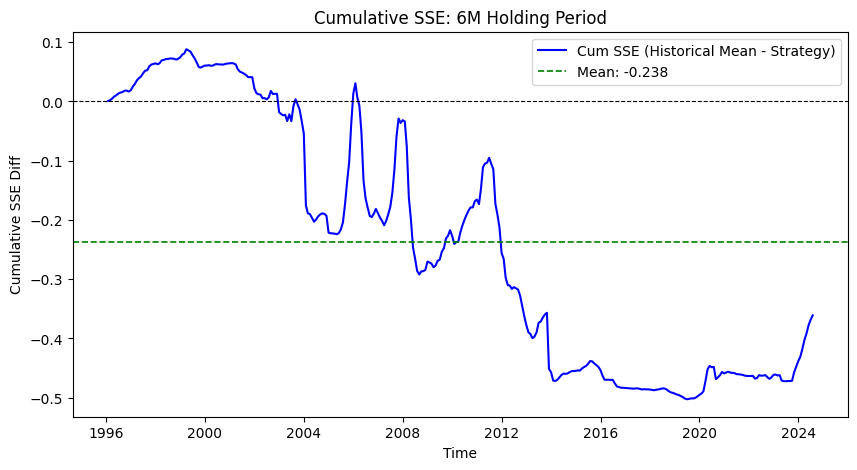

In [321]:
plt.figure(figsize=(10, 5))
plt.plot(results_df.index, results_df['Cum_SSE_diff'], label="Cum SSE (Historical Mean - Strategy)", color='blue')
plt.xlabel("Time")

#mean value
mean_value = results_df['Cum_SSE_diff'][:].mean()
plt.axhline(y=mean_value, color='green', linestyle='--', linewidth=1.2, label=f"Mean: {mean_value:.3f}")

plt.ylabel("Cumulative SSE Diff")
plt.title(f"Cumulative SSE: {fwd_ret_period}M Holding Period")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.show()

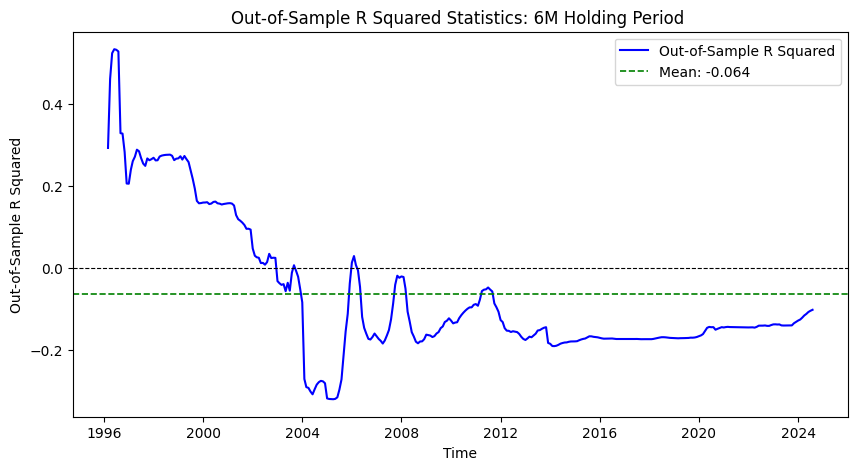

In [322]:
plt.figure(figsize=(10, 5))
plt.plot(results_df.iloc[1:].index, results_df['OOS_R_Sq'][1:], label="Out-of-Sample R Squared", color='blue') 
#omited the first data as it is noisy and makes the graph looks better to be explained in presentation, can change it back if we deep dive

#mean value of OOS R Sq
mean_value = results_df['OOS_R_Sq'][:].mean()
plt.axhline(y=mean_value, color='green', linestyle='--', linewidth=1.2, label=f"Mean: {mean_value:.3f}")

plt.xlabel("Time")
plt.ylabel("Out-of-Sample R Squared")
plt.title(f"Out-of-Sample R Squared Statistics: {fwd_ret_period}M Holding Period ")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.show()

In [323]:
results_df.to_excel("GC1_6M_20250219_x1(std)x2(std)_lasso.xlsx")

results_df

,train_end,calib_start,calib_end,test_date,best_alpha,forecast,realized,calib_error,GC1_1M_Ret,GC1_3M_Ret,...,Indian_premium_discount,PPI,hist_mean,SSE_hist,SSE_forecast,SSE_diff,Cum_SSE_diff,Cum_SSE_hist,Cum_SSE_forecast,OOS_R_Sq
test_date,,,,,,,,,,,,,,,,,,,,,
1996-01-31,1990-12-31,1991-01-31,1995-12-31,1996-01-31,0.010000,0.013334,-0.018734,0.003466,-0.0,0.0,...,0.0,-0.015895,0.024879,0.001902,0.001028,0.000874,0.000874,0.001902,0.001028,0.459367
1996-02-29,1991-01-31,1991-02-28,1996-01-31,1996-02-29,0.010000,0.015708,-0.047490,0.003345,-0.0,0.0,...,0.0,-0.015822,0.024580,0.005194,0.003994,0.001200,0.002074,0.007096,0.005022,0.292252
1996-03-31,1991-02-28,1991-03-31,1996-02-29,1996-03-31,0.010000,-0.008654,-0.034305,0.003402,-0.0,0.0,...,0.0,-0.015611,0.024338,0.003439,0.000658,0.002781,0.004855,0.010535,0.005680,0.460826
1996-04-30,1991-03-31,1991-04-30,1996-03-31,1996-04-30,0.010000,-0.005596,-0.048633,0.003374,-0.0,0.0,...,0.0,-0.015401,0.024039,0.005281,0.001852,0.003429,0.008284,0.015816,0.007532,0.523751
1996-05-31,1991-04-30,1991-05-31,1996-04-30,1996-05-31,0.010000,0.002112,-0.038903,0.003382,-0.0,0.0,...,0.0,-0.015180,0.023782,0.003929,0.001682,0.002247,0.010531,0.019746,0.009215,0.533328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,2019-02-28,2019-03-31,2024-02-29,2024-03-31,0.007055,0.083460,0.196326,0.009286,-0.0,0.0,...,-0.0,-0.000145,0.028408,0.028197,0.012739,0.015458,-0.402615,3.445786,3.848401,-0.116843
2024-04-30,2019-03-31,2019-04-30,2024-03-31,2024-04-30,0.007055,0.072494,0.171135,0.009537,-0.0,0.0,...,-0.0,-0.000452,0.028654,0.020301,0.009730,0.010571,-0.392044,3.466087,3.858131,-0.113109
2024-05-31,2019-04-30,2019-05-31,2024-04-30,2024-05-31,0.007055,0.090499,0.175570,0.009654,-0.0,0.0,...,-0.0,-0.000613,0.028906,0.021510,0.007237,0.014273,-0.377771,3.487597,3.865368,-0.108319


### 5 - Establish and Train Model - Part 2: Random Forest Study

##### **<font color= #90EE90>5.1 Sicheng Change Title Here ... </font>**

In [324]:
testing_start_date=pd.to_datetime(results_df['test_date'].iloc[0])
# Convert 'test_date' column to datetime type and set it as index
results_df["test_date"] = pd.to_datetime(results_df["test_date"])
results_df.set_index("test_date", drop=False, inplace=True)

# Get the index position of 'calib_error' column
calib_error_index = results_df.columns.get_loc("calib_error")
PPI_index = results_df.columns.get_loc("PPI")

# Extract all columns after 'calib_error'
LASSO_features_df = results_df.iloc[:, calib_error_index + 1: PPI_index + 1]

LASSO_features_df.replace(0, pd.NA, inplace=True)

LASSO_features_df.to_excel('checking_LASSO_features_df.xlsx')

LASSO_features_df

,GC1_1M_Ret,GC1_3M_Ret,GC1_6M_Ret,GC1_12M_Ret,const,SPX Index,NDX Index,DXY Curncy,USGG10YR Index,USGG2YR Index,...,GDP_Nominoal_YOY,GDP_Real_QoQ,US_Unemp,Cons_Conf,US_RIR,1M_risk_free_ret_realized,ETF_Ounces,Chinese_premium_discount,Indian_premium_discount,PPI
test_date,,,,,,,,,,,,,,,,,,,,,
1996-01-31,<NA>,<NA>,0.018351,0.020039,<NA>,<NA>,0.001055,<NA>,-0.006139,-0.007349,...,0.029132,-0.002391,-0.018247,<NA>,-0.000467,<NA>,<NA>,<NA>,<NA>,-0.015895
1996-02-29,<NA>,<NA>,0.018300,0.019985,<NA>,<NA>,0.001162,<NA>,-0.006047,-0.007297,...,0.029238,-0.002372,-0.01802,<NA>,-0.000461,<NA>,<NA>,<NA>,<NA>,-0.015822
1996-03-31,<NA>,<NA>,0.018193,0.019813,<NA>,<NA>,0.000814,<NA>,-0.007126,-0.006177,...,0.029437,-0.00231,-0.017667,<NA>,-0.000489,<NA>,<NA>,<NA>,<NA>,-0.015611
1996-04-30,<NA>,<NA>,0.018182,0.019706,<NA>,<NA>,0.000615,<NA>,-0.007444,-0.005962,...,0.029432,-0.002151,-0.017479,<NA>,-0.000482,<NA>,<NA>,<NA>,<NA>,-0.015401
1996-05-31,<NA>,<NA>,0.018063,0.019753,<NA>,<NA>,0.00072,<NA>,-0.007373,-0.006143,...,0.029565,-0.002037,-0.017183,<NA>,-0.000397,<NA>,<NA>,<NA>,<NA>,-0.01518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31,<NA>,<NA>,0.001375,0.022230,<NA>,<NA>,<NA>,<NA>,-0.005641,<NA>,...,0.001539,<NA>,-0.003716,<NA>,<NA>,<NA>,<NA>,0.005379,<NA>,-0.000145
2024-04-30,<NA>,<NA>,0.001487,0.022346,<NA>,<NA>,<NA>,<NA>,-0.005419,<NA>,...,0.001635,<NA>,-0.003761,-0.000035,<NA>,<NA>,<NA>,0.005869,<NA>,-0.000452
2024-05-31,<NA>,<NA>,0.001906,0.022135,<NA>,<NA>,<NA>,<NA>,-0.005407,<NA>,...,0.001661,<NA>,-0.003885,-0.00012,<NA>,<NA>,<NA>,0.006118,<NA>,-0.000613


In [325]:
Y

,GC1_6M_Fwd_Ret
Date,
1975-03-31,-0.134772
1975-04-30,-0.233480
1975-05-31,-0.157126
1975-06-30,-0.194823
1975-07-31,-0.175796
...,...
2024-03-31,0.196326
2024-04-30,0.171135
2024-05-31,0.175570


In [326]:
index_position = Y.index.get_loc(testing_start_date)
index_position

testing_start_date

Timestamp('1996-01-31 00:00:00')

Processing: 100%|██████████| 342/342 [00:38<00:00,  8.84it/s]


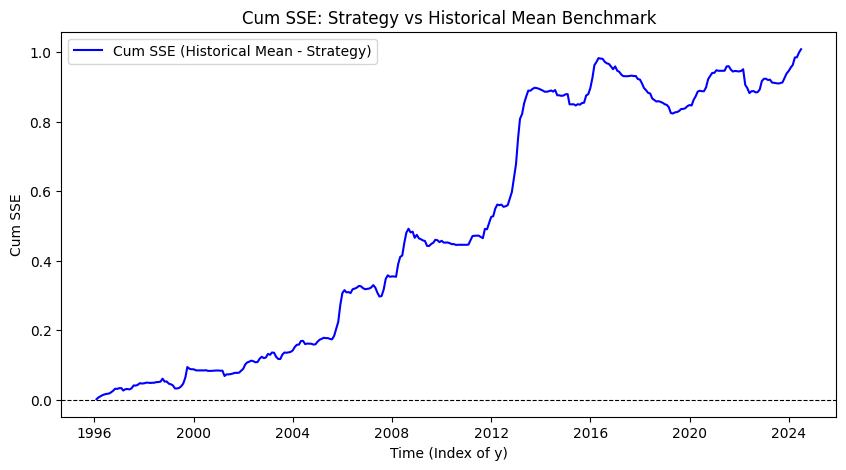

In [327]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# **Expanding Window 回归**
#start_train = 100  # 初始训练数据量
#fwd_ret_period=6
# y=gc_data[f"GC1_{fwd_ret_period}M_Fwd_Ret"].dropna(how="all")
y_historical_mean_data=gc_data[f'{GC_type}_Monthly_Excess_Return'].loc[Y.index].dropna(how='all')

# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
# 存储每个时间步的特征重要性
feature_importance_per_step = []
# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost
model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,max_features=0.6)  # 随机森林

# 存储每个时间步的预测值、历史均值误差和真实值
forest_results = []
# Get the index position
index_position = Y.index.get_loc(testing_start_date)
# 存储模型的统计结果
model_summaries = []
for t in tqdm(range(index_position, n_obs - 1), desc=f"Processing"):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X.iloc[:t]
    y_train = Y.iloc[:t]
    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X.iloc[t:t+1]
    y_test = Y.iloc[t:t+1]
    y_test = y_test.iloc[0]
    # 训练集的结束点
    current_date = Y.index[t]

    # 识别 LASSO 选择的变量（不为 NA 的列）
    selected_features = LASSO_features_df.loc[current_date].dropna().index.tolist()
    # 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        # 训练机器学习回归模型
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)[0]  # 获取单个预测值
        # 获取特征重要性
        if hasattr(model, "feature_importances_"):  # 适用于随机森林、XGBoost
            feature_importance = model.feature_importances_
        else:
            # 使用 statsmodels 重新拟合以获取系数
            X_train_sm = sm.add_constant(X_train_selected)
            ols_model = sm.OLS(y_train, X_train_sm).fit()
            feature_importance = ols_model.params[1:].values  # 跳过截距项

        # 记录当前时间步的特征重要性
        feature_importance_per_step.append(dict(zip(selected_features, feature_importance)))
        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test -  y_historical_mean.tail(36).mean() * fwd_ret_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test -  y_historical_mean.tail(36).mean() * fwd_ret_period)

    # 累计 SSE（均方误差）
    if t == index_position:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)
     # 记录当前时间步的结果
    forest_results.append({
        "Date": Y.index[t],
        "ret_real": float(y_test),
        "ret_pred": float(y_pred),
        "historical_mean":  y_historical_mean.tail(36).mean() * fwd_ret_period
    })
forest_results=pd.DataFrame(forest_results)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)
                    
SSE_diff_series = np.array(SSE_historical_cumsum)  - np.array(SSE_model_cumsum)

# **转换特征重要性 DataFrame**
df_feature_importance_per_step = pd.DataFrame(feature_importance_per_step)

# **计算特征在所有时间步的重要性均值**
df_feature_avg_importance = df_feature_importance_per_step.mean().reset_index()
df_feature_avg_importance.columns = ["Feature", "Avg Importance"]
# **计算模型的整体统计信息**
y_pred_all = model.predict(X_train_selected)


# 提取特征重要性
if hasattr(model, "feature_importances_"):
    feature_importance = dict(zip(X_train_selected.columns, model.feature_importances_))
elif isinstance(model, XGBRegressor):
    feature_importance = model.get_booster().get_score(importance_type='weight')
else:
    feature_importance = "N/A"

# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(Y.index[index_position:n_obs - 1], SSE_diff_series, label="Cum SSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("Cum SSE")
plt.title("Cum SSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()



In [328]:
feature_importance=pd.DataFrame([feature_importance])

In [329]:
feature_importance.T

,0
GC1_6M_Ret,0.111521
GC1_12M_Ret,0.171282
USGG10YR Index,0.055389
GDP_Nominoal_YOY,0.173197
US_Unemp,0.191158
Cons_Conf,0.091922
Chinese_premium_discount,0.056296
PPI,0.149235


In [330]:
forest_results

,Date,ret_real,ret_pred,historical_mean
0,1996-01-31,-0.018734,0.000474,0.024056
1,1996-02-29,-0.047490,-0.012787,0.032848
2,1996-03-31,-0.034305,-0.002596,0.031607
3,1996-04-30,-0.048633,-0.002741,0.025034
4,1996-05-31,-0.038903,-0.011952,0.014629
...,...,...,...,...
337,2024-02-29,0.167553,0.043333,0.016468
338,2024-03-31,0.196326,0.113450,0.027962
339,2024-04-30,0.171135,0.043883,0.042082
340,2024-05-31,0.175570,0.114443,0.043160


In [331]:
gc_data

,GC1_Monthly_raw_Return,GC2_Monthly_raw_Return,GC1_Monthly_Excess_Return,GC2_Monthly_Excess_Return,GC1_volatility,GC2_volatility,GC2_1M_Ret,GC1_1M_Ret,GC2_1M_Sign,GC1_1M_Sign,...,GC2_3M_Fwd_Sign,GC1_3M_Fwd_Sign,GC2_6M_Fwd_Ret,GC1_6M_Fwd_Ret,GC2_6M_Fwd_Sign,GC1_6M_Fwd_Sign,GC2_12M_Fwd_Ret,GC1_12M_Fwd_Ret,GC2_12M_Fwd_Sign,GC1_12M_Fwd_Sign
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,0.002282,-0.001123,0.002012,0.002012,NaN,NaN,0.002012,0.002012,1.0,1.0,...,1.0,1.0,-0.044603,-0.044603,-1.0,-1.0,-0.220399,-0.220399,-1.0,-1.0
1975-02-28,0.041847,0.043425,0.041340,0.041340,NaN,NaN,0.041340,0.041340,1.0,1.0,...,-1.0,-1.0,-0.048041,-0.048041,-1.0,-1.0,-0.317765,-0.317765,-1.0,-1.0
1975-03-31,-0.032772,-0.035034,-0.032981,-0.032981,0.162229,0.161182,-0.032981,-0.032981,-1.0,-1.0,...,-1.0,-1.0,-0.134772,-0.134772,-1.0,-1.0,-0.325728,-0.325728,-1.0,-1.0
1975-04-30,-0.059919,-0.060868,-0.060340,-0.060340,0.171430,0.172165,-0.060340,-0.060340,-1.0,-1.0,...,-1.0,-1.0,-0.233480,-0.233480,-1.0,-1.0,-0.319683,-0.319683,-1.0,-1.0
1975-05-31,-0.001800,0.000592,-0.002000,-0.002000,0.176185,0.181025,-0.002000,-0.002000,-1.0,-1.0,...,1.0,1.0,-0.157126,-0.157126,-1.0,-1.0,-0.261264,-0.261264,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.031639,0.031468,0.031435,0.031435,0.168238,0.169387,0.031435,0.031435,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-30,0.051211,0.050830,0.050810,0.050810,0.151431,0.154221,0.050810,0.050810,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-31,0.042046,0.042190,0.041861,0.041861,0.134111,0.135932,0.041861,0.041861,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Trading Strategy Plot

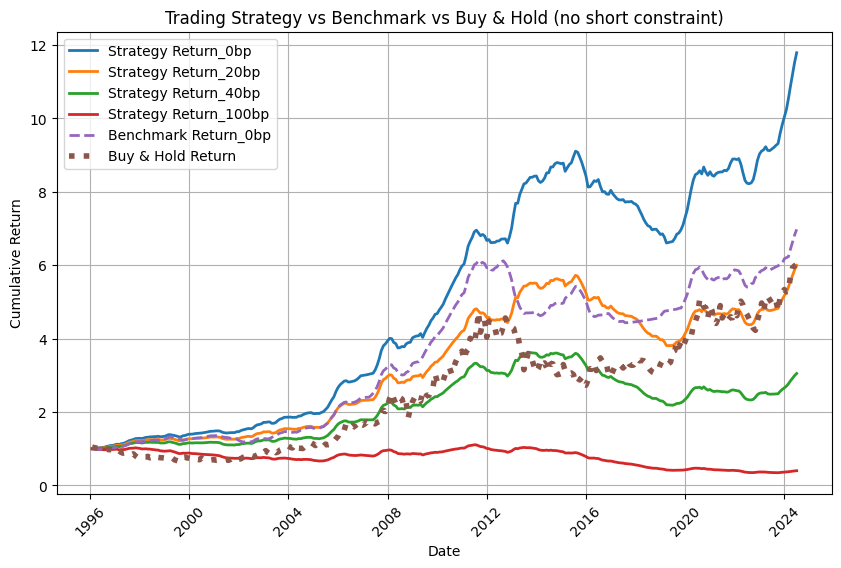

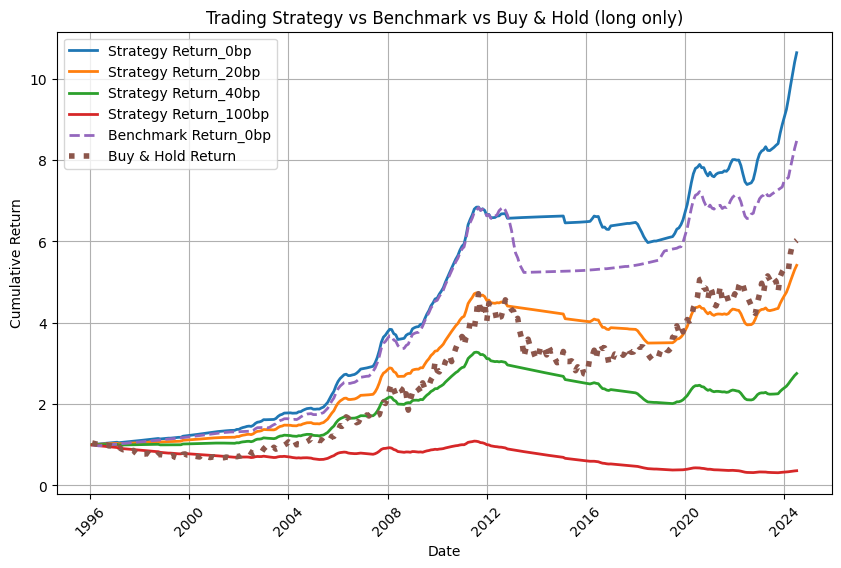

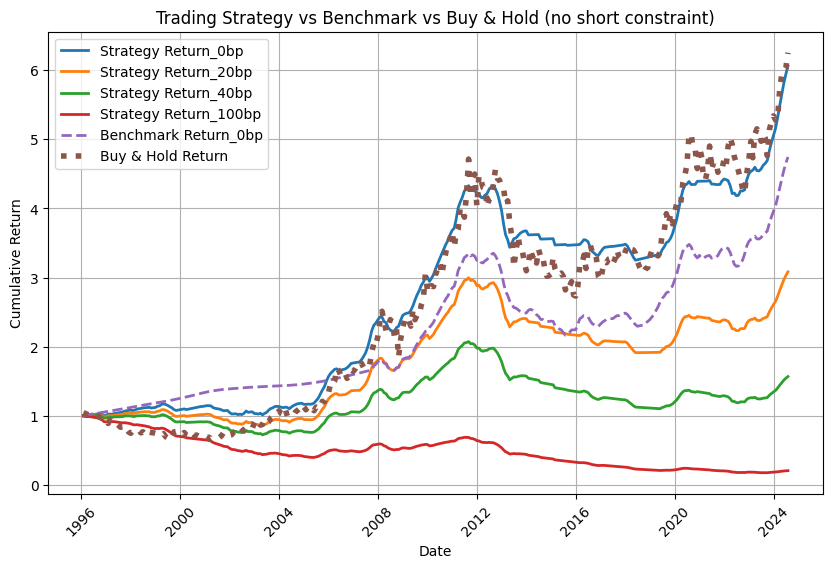

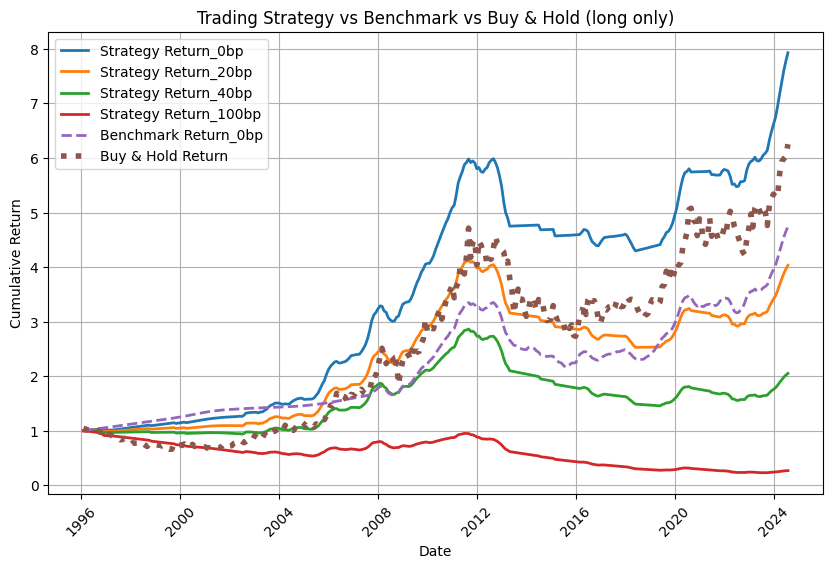

In [332]:
transaction_cost=[0,0.002,0.004,0.01]
benchmark_bp=0.000
excess_ret_benchmark=0.02
def trading_plot(learning_result,transaction_cost=[0,0.002,0.004,0.01],benchmark_bp=0.000):
    # 假设 long_short_result 已经由 learning_result 创建
    long_short_result = pd.DataFrame(learning_result)
    
    # 如果 "Date" 在列中，则设为索引
    if "Date" in long_short_result.columns:
        long_short_result.set_index("Date", inplace=True)
    
    # 获取匹配的权重值
    matching_ret = gc_data.loc[long_short_result.index, f"{GC_type}_{fwd_ret_period}M_Fwd_Ret"]
    def calculate_strategy_return(row,ret_pred_column,tc,strategy="long_short"):
            ret_pred = row[ret_pred_column]
            monthly_risk_free_rate=raw_df_al_risk_free_rate/1200
            rf_rate = monthly_risk_free_rate.loc[pd.to_datetime(row.name), f"US000{fwd_ret_period}M Index"]
            if strategy=="long_short":
                if ret_pred > excess_ret_benchmark:
                    return matching_ret[row.name] / fwd_ret_period * 1 - tc
                elif (0 < ret_pred < excess_ret_benchmark) or (-rf_rate < ret_pred < 0):
                    return rf_rate - tc
                elif ret_pred < 0 and abs(ret_pred) > 2*rf_rate:
                    return matching_ret[row.name] / fwd_ret_period * (-1) - tc
                else:
                    return 0  # 兜底条件，防止出现意外情况
            else:
                if ret_pred > excess_ret_benchmark:
                    return matching_ret[row.name] / fwd_ret_period * 1 - tc
                elif (0 < ret_pred < excess_ret_benchmark) or (-rf_rate < ret_pred < 0):
                    return rf_rate - tc
                elif ret_pred < 0 and abs(ret_pred) > 2*rf_rate:
                    return rf_rate - tc
                else:
                    return 0  # 兜底条件，防止出现意外情况
    # 计算策略回报
    for tc in transaction_cost:
        
    
        long_short_result[f"strategy_return_{int(tc*10000)}bp"] = long_short_result.apply(calculate_strategy_return, axis=1,args=("ret_pred",tc,"long_short"))
    
        # 计算累积收益
        long_short_result[f"cumulative_strategy_{int(tc*10000)}bp"] = np.exp(long_short_result[f"strategy_return_{int(tc*10000)}bp"].cumsum())
    
    # 计算基准回报
    long_short_result["benchmark_return"] = long_short_result.apply(calculate_strategy_return, axis=1,args=("historical_mean",benchmark_bp,"long_short"))


    # 计算买入持有回报
    long_short_result["buy_and_hold_return"] = gc_data[f"{GC_type}_Monthly_raw_Return"].loc[long_short_result.index]
    
    # 计算累积收益
    long_short_result["cumulative_benchmark"] = np.exp(long_short_result["benchmark_return"].cumsum())
    long_short_result["cumulative_buy_and_hold"] = np.exp(long_short_result["buy_and_hold_return"].cumsum())
    long_short_result=long_short_result.dropna()
    # 绘制收益曲线
    plt.figure(figsize=(10, 6))
    for tc in transaction_cost:
        plt.plot(long_short_result.index, long_short_result[f"cumulative_strategy_{int(tc*10000)}bp"], label=f"Strategy Return_{int(tc*10000)}bp", linewidth=2)
    plt.plot(long_short_result.index, long_short_result["cumulative_benchmark"], label=f"Benchmark Return_{int(benchmark_bp*10000)}bp", linestyle="--", linewidth=2)
    plt.plot(long_short_result.index, long_short_result["cumulative_buy_and_hold"], label="Buy & Hold Return", linestyle=":", linewidth=4)
    
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.title("Trading Strategy vs Benchmark vs Buy & Hold (no short constraint)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()
    long_result=pd.DataFrame(learning_result)
    if "Date" in long_result.columns:
        long_result.set_index("Date", inplace=True)
    for tc in transaction_cost:
        long_result[f"strategy_return_{int(tc*10000)}bp"] = long_result.apply(calculate_strategy_return, axis=1,args=("ret_pred",tc,"long"))
        long_result[f"cumulative_strategy_{int(tc*10000)}bp"] = np.exp(long_result[f"strategy_return_{int(tc*10000)}bp"].cumsum())
    
    
    # 计算基准回报
    long_result["benchmark_return"] = long_result.apply(calculate_strategy_return, axis=1,args=("historical_mean",benchmark_bp,"long"))

    # 计算买入持有回报
    long_result["buy_and_hold_return"] = gc_data[f"{GC_type}_Monthly_raw_Return"].loc[long_result.index]
    
    # 计算累积收益
    long_result["cumulative_benchmark"] = np.exp(long_result["benchmark_return"].cumsum())
    long_result["cumulative_buy_and_hold"] = np.exp(long_result["buy_and_hold_return"].cumsum())
    long_result=long_result.dropna()
    # 绘制收益曲线
    plt.figure(figsize=(10, 6))
    for tc in transaction_cost:
        plt.plot(long_result.index, long_result[f"cumulative_strategy_{int(tc*10000)}bp"], label=f"Strategy Return_{int(tc*10000)}bp", linewidth=2)
    plt.plot(long_result.index, long_result["cumulative_benchmark"], label=f"Benchmark Return_{int(benchmark_bp*10000)}bp", linestyle="--", linewidth=2)
    plt.plot(long_result.index, long_result["cumulative_buy_and_hold"], label="Buy & Hold Return", linestyle=":", linewidth=4)
    
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.title("Trading Strategy vs Benchmark vs Buy & Hold (long only)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()
    return long_short_result,long_result
forest_long_short_performance_df,forest_long_only_performance_df=trading_plot(forest_results)
LASSO_long_short_performance_df,LASSO_long_only_performance_df=trading_plot(LASSO_result)

In [333]:
LASSO_result

[{'Date': Timestamp('1996-01-31 00:00:00'),
  'ret_real': -0.018733840771865344,
  'ret_pred': 0.013333704376616955,
  'historical_mean': np.float64(0.016457943402988454)},
 {'Date': Timestamp('1996-02-29 00:00:00'),
  'ret_real': -0.04748976449428267,
  'ret_pred': 0.015707917859101247,
  'historical_mean': np.float64(0.016123042419294995)},
 {'Date': Timestamp('1996-03-31 00:00:00'),
  'ret_real': -0.034304832713554195,
  'ret_pred': -0.008654034801821284,
  'historical_mean': np.float64(0.015733137919776305)},
 {'Date': Timestamp('1996-04-30 00:00:00'),
  'ret_real': -0.048633265037807405,
  'ret_pred': -0.00559559821909332,
  'historical_mean': np.float64(0.015523973803233903)},
 {'Date': Timestamp('1996-05-31 00:00:00'),
  'ret_real': -0.03890294223615614,
  'ret_pred': 0.0021123869192815094,
  'historical_mean': np.float64(0.01530236827589413)},
 {'Date': Timestamp('1996-06-30 00:00:00'),
  'ret_real': -0.048699180145118134,
  'ret_pred': 0.000952890952221043,
  'historical_mean'

### Performance Dataframe

In [334]:
# 计算指标
def performance_calculator(model_result):
    performance_metrics = []
    
    def calculate_sharpe_ratio(returns, risk_free_rate=0):
        """ 计算夏普率 """
        excess_returns = returns - risk_free_rate
        return excess_returns.mean() / excess_returns.std() if excess_returns.std() != 0 else np.nan
    
    def calculate_max_drawdown(cumulative_returns):
        """ 计算最大回撤 """
        peak   = np.maximum.accumulate(cumulative_returns)
        drawdown = (cumulative_returns - peak) / peak
        return drawdown.min()
    
    for tc in transaction_cost:
        col_name_return = f"strategy_return_{int(tc*10000)}bp"
        col_name_cum = f"cumulative_strategy_{int(tc*10000)}bp"
    
        final_net_value = model_result[col_name_cum].iloc[-1]
        annualized_return = model_result[col_name_return].mean() * 12
        sharpe_ratio = calculate_sharpe_ratio(model_result[col_name_return])
        max_drawdown = calculate_max_drawdown(model_result[col_name_cum])
        
        performance_metrics.append(["Strategy", f"{int(tc*10000)}bp", final_net_value, annualized_return, sharpe_ratio, max_drawdown])
    
    # 计算基准策略的绩效
    final_net_value_benchmark = model_result["cumulative_benchmark"].iloc[-1]
    annualized_return_benchmark = model_result["benchmark_return"].mean() * 12
    sharpe_ratio_benchmark = calculate_sharpe_ratio(model_result["benchmark_return"])
    max_drawdown_benchmark = calculate_max_drawdown(model_result["cumulative_benchmark"])
    performance_metrics.append(["Benchmark", f"{int(benchmark_bp*10000)}bp", final_net_value_benchmark, annualized_return_benchmark, sharpe_ratio_benchmark, max_drawdown_benchmark])
    
    # 计算买入持有策略的绩效
    final_net_value_bh = model_result["cumulative_buy_and_hold"].iloc[-1]
    annualized_return_bh = model_result["buy_and_hold_return"].mean() * 12
    sharpe_ratio_bh = calculate_sharpe_ratio(model_result["buy_and_hold_return"])
    max_drawdown_bh = calculate_max_drawdown(model_result["cumulative_buy_and_hold"])
    performance_metrics.append(["Buy & Hold", "-", final_net_value_bh, annualized_return_bh, sharpe_ratio_bh, max_drawdown_bh])
    
    # 创建结果 DataFrame
    performance_df = pd.DataFrame(performance_metrics, columns=["Strategy", "Transaction Cost", "Final Net Value", "Annualized Return", "Sharpe Ratio", "Max Drawdown"])
    return performance_df
forest_long_short_performance_output=performance_calculator(forest_long_short_performance_df)
forest_long_only_performance_output=performance_calculator(forest_long_only_performance_df)
LASSO_long_short_performance_output=performance_calculator(LASSO_long_short_performance_df)
LASSO_long_only_performance_output=performance_calculator(LASSO_long_only_performance_df)
forest_long_short_performance_output

,Strategy,Transaction Cost,Final Net Value,Annualized Return,Sharpe Ratio,Max Drawdown
0,Strategy,0bp,11.792055,0.086576,0.476587,-0.274689
1,Strategy,20bp,5.998000,0.062857,0.346238,-0.334459
2,Strategy,40bp,3.050868,0.039138,0.215678,-0.396712
3,Strategy,100bp,0.401489,-0.032020,-0.176471,-0.686875
4,Benchmark,0bp,6.978499,0.068170,0.361832,-0.275464
5,Buy & Hold,-,6.028343,0.063034,0.115243,-0.420434


-----

## Placeholder

In [ ]:
# **Expanding Window 回归**
start_train = 100   #amount of training datapoints in the beginning 初始训练数据量

# LASSO Regularization
scaler = StandardScaler() #standarized by z score
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
n_obs = len(Y)

# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
# 存储每个时间步的特征重要性
feature_importance_per_step = []
# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost
model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,max_features=0.6)  # 随机森林
# model = SVR(kernel='rbf')  # 支持向量回归
# 存储每个时间步的预测值、历史均值误差和真实值
results = []

# 存储模型的统计结果
model_summaries = []

## ___________________________

## <font color="yellow">Previous Work - Sicheng</font>

### Placeholder

##### **<font color= #90EE90>(Place holder) Split dataframe into X and Y</font>** 

In [ ]:
# Separate Gold Price Futures Data
import pandas as pd

gc_data = combined_df_by_month.iloc[:, :32]
x_variables_data = combined_df_by_month.iloc[:, 32:56]
x_variables_data
gc_data

##### Sharpe Ratio

In [ ]:
# Ensure required columns exist before calculation
required_cols = ['GC1_Monthly_Excess_Return', 'GC1_volatility', 'GC2_Monthly_Excess_Return', 'GC2_volatility']
missing_cols = [col for col in required_cols if col not in gc_data.columns]
if missing_cols:
    raise ValueError(f"Missing required columns in gc_data: {missing_cols}")

# Compute Sharpe ratios and store in gc_data
gc_data['GC1_sharpe'] = gc_data['GC1_Monthly_Excess_Return']*12 / gc_data['GC1_volatility']
gc_data['GC2_sharpe'] = gc_data['GC2_Monthly_Excess_Return']*12 / gc_data['GC2_volatility']
gc_data

In [ ]:
# Consider lag in x regressors
x_variables_data=x_variables_data.shift(1)
x_variables_data["PCE CYOY Index"]=x_variables_data["PCE CYOY Index"].shift(1)
x_variables_data["GDP_Nominoal_YOY"]=x_variables_data["GDP_Nominoal_YOY"].shift(1)
x_variables_data["GDP_Real_QoQ"]=x_variables_data["GDP_Real_QoQ"].shift(1)
x_variables_data["CPI_YoY"]=x_variables_data["CPI_YoY"].shift(1)
x_variables_data["US_Unemp"]=x_variables_data["US_Unemp"].shift(1)
x_variables_data["PPI"]=x_variables_data["PPI"].shift(1)
x_variables_data

##### **<font color= #90EE90>4.2 Train model</font>** 

##### Below is the code to run individual OLS regression on Y, already stopped to use, use LASSO instead

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit

# Ensure Date is datetime index
gc_data.index = pd.to_datetime(gc_data.index, format='%Y-%m')
x_variables_data.index = pd.to_datetime(x_variables_data.index, format='%Y-%m')

# Ensure both DataFrames are sorted by date
gc_data = gc_data.sort_index()
x_variables_data = x_variables_data.sort_index()

# Target variable 
y = gc_data['GC2_12M_Fwd_Ret'].dropna(how='all')

# Predictor variables (all columns from x_variables_data)
# Align predictor variables (X) to y's index
X = x_variables_data.copy().loc[y.index]  # Only keep rows where y has data

# Define number of folds
n_splits = 10  

# Dictionary to store statistics
t_values = {col: [] for col in X.columns}
p_values = {col: [] for col in X.columns}
significant_counts = {col: 0 for col in X.columns}
coefficients = {col: [] for col in X.columns}  # Store regression coefficients
r2_values = {col: [] for col in X.columns}  # Store R² values

# Iterate over each feature independently
for feature in X.columns:
    # Extract the specific feature column
    X_feature = X[[feature]].dropna()  # Remove NaNs for this feature

    # Align y with available X data
    y_feature = y.loc[X_feature.index]

    # Ensure at least `n_splits` * 2 data points exist
    if len(X_feature) < n_splits * 2:
        continue  # Skip this feature if not enough data points

    # Define rolling window TimeSeriesSplit only for this feature's data range
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Perform rolling window time series validation
    for train_idx, test_idx in tscv.split(X_feature):
        X_train, X_test = X_feature.iloc[train_idx], X_feature.iloc[test_idx]
        y_train, y_test = y_feature.iloc[train_idx], y_feature.iloc[test_idx]

        # Skip if no valid training data
        if len(X_train) == 0 or len(y_train) == 0:
            continue

        # Add intercept term
        X_train_with_const = sm.add_constant(X_train)

        # Fit OLS model
        model = sm.OLS(y_train, X_train_with_const).fit()

        # Extract regression results
        coef = model.params[feature]
        t_stat = model.tvalues[feature]
        p_value = model.pvalues[feature]
        r2 = model.rsquared

        # Store results
        coefficients[feature].append(coef)
        t_values[feature].append(t_stat)
        p_values[feature].append(p_value)
        r2_values[feature].append(r2)

        # If p-value < 0.05/len(X.columns), count as significant
        if p_value < (0.05):  # Bonferroni correction
            significant_counts[feature] += 1

# Create a DataFrame to store regression results
t_test_results = pd.DataFrame({
    "Mean_t_value": {col: np.nanmean(np.abs(t_values[col])) for col in X.columns},  # Mean t-value
    "Mean_p_value": {col: np.nanmean(p_values[col]) for col in X.columns},  # Mean p-value
    "Significant_fold_count": significant_counts,  # Count of significant folds
    "Mean_coefficient": {col: np.nanmean(coefficients[col]) for col in X.columns},  # Mean coefficient
    "Mean_R2": {col: np.nanmean(r2_values[col]) for col in X.columns}  # Mean R² value
})

# Sort by significance count
t_test_results = t_test_results.sort_values(by="Significant_fold_count", ascending=False)
t_test_results



##### Placeholder: This is to find out which variables is significant, stopped to use as well

In [ ]:
# Get the list of significant column names from t_test_results
significant_columns = t_test_results.loc[t_test_results['Significant_fold_count'] >= 1].index.tolist()

# Keep only the columns in x_variables_data that match the significant columns
filtered_x_variables_data = x_variables_data[significant_columns]
# Fill NaN values with 0
filtered_x_variables_data = filtered_x_variables_data.fillna(0)
filtered_x_variables_data

#### Below is an OLS regression for all the Xs against Y, stopped to use as well

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit

# Target variable
y = gc_data['GC1_12M_Fwd_Ret'].dropna(how='all')
# Predictor variables
X = filtered_x_variables_data.fillna(0).copy().loc[y.index]
X = sm.add_constant(X)  # Add intercept term

n_splits = 10  

# Store model summaries
model_summaries = []

if len(X) >= n_splits * 2:
    tscv = TimeSeriesSplit(n_splits=n_splits)
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if X_train.empty or y_train.empty:
            print("Warning: X_train or y_train is empty, skipping this fold.")
            continue

        # Fit OLS regression model
        model = sm.OLS(y_train, X_train).fit()

        # Store model summary
        model_summaries.append(model.summary())

# Print the summary for the last fold (for inspection)
if model_summaries:
    print(model_summaries[-1])  # Output last model summary
else:
    print("No valid models were fitted.")


##### **<font color= #90EE90>4.3 Regularization</font>** 

##### **[IN USE] LASSO regression - To find all the variable that is useful**

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Target variable
y = gc_data['GC1_3M_Fwd_Ret'].dropna(how='all')
#y = gc_data['GC1_Monthly_Excess_Return'].dropna(how='all')


y_historical_mean_data=gc_data['GC1_Monthly_Excess_Return'].dropna(how='all')
fwd_ret_period=6
# Predictor variable
X = x_variables_data.fillna(0).copy().loc[y.index]
X = sm.add_constant(X)  #Intercept

# No. of Splits
n_splits = 10  

# LASSO Regularization
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

# Cross Validation
if len(X_scaled) >= n_splits * 2:
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Record the regression statistics for each fold of CV - 记录每个折叠的回归系数
    lasso_coefficients = []

    for train_idx, test_idx in tscv.split(X_scaled):
        X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if X_train.empty or y_train.empty:
            print("Warning: X_train or y_train is empty, skipping this fold.")
            continue

        # Use LASSO CV to choose the best alpha option - 使用 LASSO 交叉验证选择最佳 alpha
        lasso_cv = LassoCV(cv=tscv, random_state=42).fit(X_train, y_train)
        best_alpha = lasso_cv.alpha_

        # Use the best alpha option to train the LASSO model - 使用最佳 alpha 训练 LASSO 模型
        lasso = Lasso(alpha=best_alpha).fit(X_train, y_train)

        # Save Lasso coefficient series 存储回归系数
        lasso_coefficients.append(pd.Series(lasso.coef_, index=X.columns))

    # Combine LASSO coefficients in a dataframe 合并所有折叠的回归系数
    lasso_coeff_df = pd.DataFrame(lasso_coefficients)
    
    # Calculate the average of LASSO coefficients 计算平均系数
    avg_lasso_coeff = lasso_coeff_df.mean()
    
    # Filter out LASSO coefficients that are larger than 0 选择非零系数的特征
    selected_features = avg_lasso_coeff[avg_lasso_coeff != 0].index.tolist()
    # Print Lasso Results 输出 LASSO 选择的变量及其系数
    print("LASSO Selected Features and Coefficients (Averaged Across Folds):")
    print(avg_lasso_coeff)

    # **Expanding Window for training**
    start_train = 300  #初始训练数据量
    n_obs = len(y)

    # Record SSE - 记录 SSE 累计误差
    SSE_model_cumsum = []
    SSE_historical_cumsum = []

    for t in range(start_train, n_obs - 1):
        # 使用当前时间 t 之前的所有数据进行训练
        X_train = X_scaled.iloc[:t]
        y_train = y.iloc[:t]
        y_historical_mean=y_historical_mean_data.iloc[:t]
        # 预测下一步 t+1
        X_test = X_scaled.iloc[t:t+1]
        y_test = y.iloc[t:t+1]
        
        # Only keeps coeff > 0 after Lasso regularization - 仅保留 LASSO 选择的变量
        if len(selected_features) > 0:
            X_train_selected = X_train[selected_features]
            X_test_selected = X_test[selected_features]

            # Add constant - 添加截距项
            X_train_selected = sm.add_constant(X_train_selected)
            X_test_selected = sm.add_constant(X_test_selected)

            # **确保测试数据的列顺序与训练数据一致**
            X_test_selected = X_test_selected.reindex(columns=X_train_selected.columns, fill_value=0)

            # 进行 OLS 回归
            ols_model = sm.OLS(y_train, X_train_selected).fit()
            y_pred = ols_model.predict(X_test_selected)

            # 计算策略预测误差 f_t+1
            forecast_error = float(y_test - y_pred)
        else:
            # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
            forecast_error = float(y_test - y_historical_mean.mean()*fwd_ret_period)

        # 计算历史均值预测误差 m_t+1
        historical_mean_error = float(y_test - y_historical_mean.mean()*fwd_ret_period)

        # Cumulative SSE - 累计 SSE（均方误差）
        if t == start_train:
            SSE_model_cumsum.append(forecast_error ** 2)
            SSE_historical_cumsum.append(historical_mean_error ** 2)
        else:
            SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
            SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)

    # Change of RMSE as time goes - **计算 ΔRMSE 随时间的变化**
    delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                        np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)

    # **绘制 ΔRMSE**
    plt.figure(figsize=(10, 5))
    plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')
    plt.xlabel("Time")
    plt.ylabel("ΔRMSE")
    plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
    plt.legend()
    plt.show()


##### --- Duplicate Sicheng's Work by Alfred ---

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Target variable
y = gc_data['GC1_3M_Fwd_Ret'].dropna(how='all')
#y = gc_data['GC1_Monthly_Excess_Return'].dropna(how='all')



y_historical_mean_data=gc_data['GC1_Monthly_Excess_Return'].dropna(how='all')
fwd_ret_period=6
# Predictor variable
X = x_variables_data.fillna(0).copy().loc[y.index]
X = sm.add_constant(X)  #Intercept

# No. of Splits
n_splits = 10  

# LASSO Regularization
scaler = StandardScaler() #standarized by z score
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)


#checking 
#check_df = pd.DataFrame([gc_data['GC1_Monthly_Excess_Return'],y]).T
#check_df
y_historical_mean_data.head(30)

X
#X_scaled
x_variables_data #with 1 month lag for the actual data

In [ ]:

# Cross Validation
if len(X_scaled) >= n_splits * 2: #split it into 10 folds
    tscv = TimeSeriesSplit(n_splits=n_splits)

    # Record the regression statistics for each fold of CV - 记录每个折叠的回归系数
    lasso_coefficients = []

    for train_idx, test_idx in tscv.split(X_scaled):
        X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if X_train.empty or y_train.empty:
            print("Warning: X_train or y_train is empty, skipping this fold.")
            continue

        # Use LASSO CV to choose the best alpha option - 使用 LASSO 交叉验证选择最佳 alpha
        lasso_cv = LassoCV(cv=tscv, random_state=42).fit(X_train, y_train)
        best_alpha = lasso_cv.alpha_ #smallest Lasso alpha means best fit of the model
        #print(best_alpha)
        
        # Use the best alpha option to train the LASSO model - 使用最佳 alpha 训练 LASSO 模型
        lasso = Lasso(alpha=best_alpha).fit(X_train, y_train)

        # Save Lasso coefficient series 存储回归系数
        lasso_coefficients.append(pd.Series(lasso.coef_, index=X.columns))

    # Combine LASSO coefficients in a dataframe 合并所有折叠的回归系数
    lasso_coeff_df = pd.DataFrame(lasso_coefficients)
    print(lasso_coeff_df)
    
    # Calculate the average of LASSO coefficients 计算平均系数
    avg_lasso_coeff = lasso_coeff_df.mean()
    
    # Filter out LASSO coefficients that are larger than 0 选择非零系数的特征
    selected_features = avg_lasso_coeff[avg_lasso_coeff != 0].index.tolist()
    # Print Lasso Results 输出 LASSO 选择的变量及其系数
    
    print("\n\nLASSO Selected Features and Coefficients (Averaged Across Folds):")
    print(avg_lasso_coeff)
    
    print("\n\nThe selected features by the LASSO models are:") 
    shortern_dict = avg_lasso_coeff.to_dict()
    features_list = [key for key, val in shortern_dict.items() if val !=0]
    print(features_list)
    
    

    # **Expanding Window for training**
    start_train = 300  #初始训练数据量
    n_obs = len(y)

    # Record SSE - 记录 SSE 累计误差
    SSE_model_cumsum = []
    SSE_historical_cumsum = []


In [ ]:
print(selected_features)

In [ ]:


for t in range(start_train, n_obs - 1):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X_scaled.iloc[:t]
    y_train = y.iloc[:t]
    y_historical_mean=y_historical_mean_data.iloc[:t]
    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]
    
    
    # Only keeps coeff > 0 after Lasso regularization - 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]
        #print(X_train_selected.columns)

        # Add constant - 添加截距项
        X_train_selected = sm.add_constant(X_train_selected)
        X_test_selected = sm.add_constant(X_test_selected)

        # **确保测试数据的列顺序与训练数据一致**
        X_test_selected = X_test_selected.reindex(columns=X_train_selected.columns, fill_value=0)

        # 进行 OLS 回归
        ols_model = sm.OLS(y_train, X_train_selected).fit()
        y_pred = ols_model.predict(X_test_selected)

        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean()*fwd_ret_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean()*fwd_ret_period)

    # Cumulative SSE - 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)

# Change of RMSE as time goes - **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1)


In [ ]:
# **绘制 ΔRMSE**

plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')
plt.xlabel("Time")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()


#### (In use)Below is using the variables that proofed Useful by LASSO and perform a time-series forecasting using Random Forest

In [ ]:
import platform
import sys

print("Python executable:", sys.executable)
print("Architecture:", platform.architecture())

In [ ]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# **Expanding Window 回归**
start_train = 30  # 初始训练数据量
n_obs = len(y)
fwd_ret_period=3
sign_threshold = 0.90  # 阈值：90% 以上的时间步符号一致
# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
# 存储每个时间步的特征重要性
feature_importance_per_step = []
# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost
model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,max_features=0.6)  # 随机森林
# model = SVR(kernel='rbf')  # 支持向量回归
# 存储每个时间步的预测值、历史均值误差和真实值
results = []
# 存储模型的统计结果
model_summaries = []
for t in tqdm(range(start_train, n_obs - 1), desc=f"Processing"):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X_scaled.iloc[:t]
    y_train = y.iloc[:t]
    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]

    # 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        # 训练机器学习回归模型
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)[0]  # 获取单个预测值
        # 获取特征重要性
        if hasattr(model, "feature_importances_"):  # 适用于随机森林、XGBoost
            feature_importance = model.feature_importances_
        else:
            # 使用 statsmodels 重新拟合以获取系数
            X_train_sm = sm.add_constant(X_train_selected)
            ols_model = sm.OLS(y_train, X_train_sm).fit()
            feature_importance = ols_model.params[1:].values  # 跳过截距项

        # 记录当前时间步的特征重要性
        feature_importance_per_step.append(dict(zip(selected_features, feature_importance)))
        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean() * fwd_ret_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean() * fwd_ret_period)

    # 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)
     # 记录当前时间步的结果
    results.append({
        "Time Index": y.index[t],
        "y_test": float(y_test),
        "y_pred": float(y_pred),
        "historical_mean_error": y_historical_mean.mean() * fwd_ret_period
    })
results=pd.DataFrame(results)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)
# **转换特征重要性 DataFrame**
df_feature_importance_per_step = pd.DataFrame(feature_importance_per_step)

# **计算特征在所有时间步的重要性均值**
df_feature_avg_importance = df_feature_importance_per_step.mean().reset_index()
df_feature_avg_importance.columns = ["Feature", "Avg Importance"]
# **计算模型的整体统计信息**
y_pred_all = model.predict(X_train_selected)

# 计算 R²、MSE、RMSE
r2 = r2_score(y_train, y_pred_all)
mse = mean_squared_error(y_train, y_pred_all)
rmse = np.sqrt(mse)

# 提取特征重要性
if hasattr(model, "feature_importances_"):
    feature_importance = dict(zip(X_train_selected.columns, model.feature_importances_))
elif isinstance(model, XGBRegressor):
    feature_importance = model.get_booster().get_score(importance_type='weight')
else:
    feature_importance = "N/A"

# 组织统计结果
model_summary = {
    "Model": type(model).__name__,
    "R-squared": r2,
    "MSE": mse,
    "RMSE": rmse,
    "Feature Importance": feature_importance
}

# 将统计结果转换为 DataFrame
df_model_summary = pd.DataFrame({
    "Metric": ["R-squared", "MSE", "RMSE"],
    "Value": [r2, mse, rmse]
})

# 显示表格
print(df_model_summary)

# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()


In [ ]:
df_feature_avg_importance

In [ ]:
results=pd.DataFrame(results)
# 设置时间索引
results.set_index("Time Index", inplace=True)
results.index.name = "Date"
results

In [ ]:
results

#### Alfred Redo with fewer parameters

In [ ]:
selected_features_2 = ['SPX Index',
 'CPI YOY Index',
 'GDP_Nominoal_YOY',
 'GDP_Real_QoQ',
 'US_Unemp',
 'US_RIR']

 # select one between 'GDP_Real_QoQ' or 'GDP_Nominoal_YOY'

In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# **Expanding Window 回归**
start_train = 30  # 初始训练数据量
n_obs = len(y)
sign_threshold = 0.90  # 阈值：90% 以上的时间步符号一致
# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
# 存储每个时间步的特征重要性
feature_importance_per_step = []
# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost

#Use Random Forest for Prediction
model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,max_features=0.6)  # 随机森林


# model = SVR(kernel='rbf')  # 支持向量回归
# 存储每个时间步的预测值、历史均值误差和真实值
results = []
# 存储模型的统计结果
model_summaries = []

for t in tqdm(range(start_train, n_obs - 1), desc=f"Processing"):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X_scaled.iloc[:t]
    y_train = y.iloc[:t]
    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]

    # 仅保留 LASSO 选择的变量
    
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features_2]
        X_test_selected = X_test[selected_features_2]

        # 训练机器学习回归模型
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)[0]  # 获取单个预测值
        # 获取特征重要性
        if hasattr(model, "feature_importances_"):  # 适用于随机森林、XGBoost
            feature_importance = model.feature_importances_
        else:
            # 使用 statsmodels 重新拟合以获取系数
            X_train_sm = sm.add_constant(X_train_selected)
            ols_model = sm.OLS(y_train, X_train_sm).fit()
            feature_importance = ols_model.params[1:].values  # 跳过截距项

        # 记录当前时间步的特征重要性
        feature_importance_per_step.append(dict(zip(selected_features, feature_importance)))
        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean() * fwd_ret_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean() * fwd_ret_period)

    # 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)
     # 记录当前时间步的结果
    results.append({
        "Time Index": y.index[t],
        "y_test": float(y_test),
        "y_pred": float(y_pred),
        "historical_mean_error": y_historical_mean.mean() * fwd_ret_period
    })
results=pd.DataFrame(results)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)
# **转换特征重要性 DataFrame**
df_feature_importance_per_step = pd.DataFrame(feature_importance_per_step)

# **计算特征在所有时间步的重要性均值**
df_feature_avg_importance = df_feature_importance_per_step.mean().reset_index()
df_feature_avg_importance.columns = ["Feature", "Avg Importance"]
# **计算模型的整体统计信息**
y_pred_all = model.predict(X_train_selected)

# 计算 R²、MSE、RMSE
r2 = r2_score(y_train, y_pred_all)
mse = mean_squared_error(y_train, y_pred_all)
rmse = np.sqrt(mse)

# 提取特征重要性
if hasattr(model, "feature_importances_"):
    feature_importance = dict(zip(X_train_selected.columns, model.feature_importances_))
elif isinstance(model, XGBRegressor):
    feature_importance = model.get_booster().get_score(importance_type='weight')
else:
    feature_importance = "N/A"

# 组织统计结果
model_summary = {
    "Model": type(model).__name__,
    "R-squared": r2,
    "MSE": mse,
    "RMSE": rmse,
    "Feature Importance": feature_importance
}

# 将统计结果转换为 DataFrame
df_model_summary = pd.DataFrame({
    "Metric": ["R-squared", "MSE", "RMSE"],
    "Value": [r2, mse, rmse]
})

# 显示表格
print(df_model_summary)

# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()


In [ ]:
model_summary

In [ ]:
results

## <font color="yellow"> Time Series TSM - Alfred </font>

#### Step 0: Continue from Time Series Dataframe in Previous Work

In [ ]:
#View Gold price futures data
gc_data
gc_data.to_csv("gc_data_raw.csv")

#gc_data.columns

#### Step 1: Modify Dataframe

##### <font color= #90EE90> 1.1: Formulate Next Month (Actual) Sharpe Ratio </font> 

In [ ]:
#Create new copy specifically for time series moementum strategy
gc_data.rename(columns={'GC1_volatility':'GC1_vol_annualized','GC2_volatility':'GC2_vol_annualized'},inplace=True)
gc_data_new = gc_data.copy()

#Calculate Actual Sharpe Ratio - Monthly
gc_data_new['GC1_vol_monthly'] = gc_data_new['GC1_vol_annualized']/ np.sqrt(12)
gc_data_new['GC2_vol_monthly'] = gc_data_new['GC2_vol_annualized']/ np.sqrt(12)

#Produce 1 Month historical and forward (actual) Sharpe Ratio
gc_data_new.rename(columns={'GC1_sharpe':'GC1_sharpe_1M_Hist','GC2_sharpe':'GC2_sharpe_1M_Hist'},inplace=True)
gc_data_new['GC1_sharpe_1M_Hist'] = gc_data_new['GC1_Monthly_Excess_Return']/gc_data_new['GC1_vol_monthly']
gc_data_new['GC2_sharpe_1M_Hist'] = gc_data_new['GC2_Monthly_Excess_Return']/gc_data_new['GC2_vol_monthly']
gc_data_new['GC1_sharpe_1M_RetHist_VolLag1'] = gc_data_new['GC1_Monthly_Excess_Return']/gc_data_new['GC1_vol_monthly'].shift(1)
gc_data_new['GC2_sharpe_1M_RetHist_VolLag1'] = gc_data_new['GC2_Monthly_Excess_Return']/gc_data_new['GC2_vol_monthly'].shift(1)

gc_data_new['GC1_sharpe_1M_Fwd'] = gc_data_new['GC1_sharpe_1M_Hist'].shift(1)
gc_data_new['GC2_sharpe_1M_Fwd'] = gc_data_new['GC2_sharpe_1M_Hist'].shift(1)

#Export CSV
gc_data_new.to_csv("gc_data_v1.csv")
gc_data_new




##### <font color= #90EE90> 1.2: Shift 1 month for 3M, 6M, 12M Return Sign  </font> 

In [ ]:
shift_columns_gc_all = ["GC1_1M_Sign","GC2_1M_Sign",'GC1_3M_Sign','GC2_3M_Sign','GC1_6M_Sign','GC2_6M_Sign','GC1_12M_Sign','GC2_12M_Sign']
shift_columns_gc2= ["GC2_1M_Sign",'GC2_3M_Sign','GC2_6M_Sign','GC2_12M_Sign']
shift_col_exp_1M = ['GC1_3M_Sign','GC2_3M_Sign','GC1_6M_Sign','GC2_6M_Sign','GC1_12M_Sign','GC2_12M_Sign']

for col in shift_columns_gc_all:
    x_variables_data[col+'_lag_1']=gc_data_new[col].shift(1)

for col in shift_col_exp_1M:
    x_variables_data[col+'_lag_2']=gc_data_new[col].shift(2)

x_variables_data.to_csv("gc_data_v2_20250215.csv")
x_variables_data

#### Step 2: Create Train-Calibrate-Test Split Dataset

##### <font color= #90EE90> _2.1: Separate dataframes_ </font> 

In [ ]:
# GC2_Features = ['GC2_1M_Sign_lag_1','GC2_3M_Sign_lag_1','GC2_6M_Sign_lag_1','GC2_12M_Sign_lag_1']
# GC1_Features = ['GC1_1M_Sign_lag_1','GC1_3M_Sign_lag_1','GC1_6M_Sign_lag_1','GC1_12M_Sign_lag_1']
# 
# #gc2 only
# xy_tsm = gc_data_new[['GC2_sharpe_1M_Hist']+ ['GC2_sharpe_1M_Fwd'] + ['GC2_sharpe_1M_RetHist_VolLag1'] + GC2_Features].dropna(how='any')
# 
# y_tsm = pd.DataFrame()
# 
# y_tsm['GC2_sharpe_1M_RetT_VolT-1'] = xy_tsm['GC2_sharpe_1M_RetHist_VolLag1']
# x_tsm = xy_tsm[[col for col in GC2_Features]]
# 
# #checking
# #x_tsm
# 
# y_tsm.to_csv("y_tsm.csv")
# 
# y_tsm
# 
# #xy_tsm


##### <font color= #90EE90> _2.2: Define Cross Validation Fold_ </font> 

Method: Rolling folds that trains every month

In [ ]:
train_start = pd.Timestamp('1976-01-31')
train_end = pd.Timestamp('1990-12-31')  #initial training period

calib_start = pd.Timestamp('1991-01-31') 
calib_end = pd.Timestamp('1995-12-31') 

test_date = calib_end + pd.DateOffset(months=1)


#### Step 3: Train Model

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error as mse
from tqdm import tqdm


##### **Test Code (1 iteration)**

In [ ]:
"""
#Design rolling loop algorithm

results = []

#while test_date <= pd.Timestamp('2010-12-31'):
    
#create train dataset
x_tsm_train = x_tsm.loc[:train_end]
y_tsm_train = y_tsm.loc[:train_end]

#create calibration dataset
x_tsm_calib = x_tsm.loc[calib_start:calib_end]
y_tsm_calib = y_tsm.loc[calib_start:calib_end]

#test data
x_tsm_test = x_tsm.loc[test_date:test_date]

#define alpha and error before loop
best_alpha = None
least_error = np.inf

#checking
x_tsm_train

"""

In [ ]:
"""
for a in alphas:
    if regression_type == 'ridge':
        candidate_model = Ridge(alpha= a)
    else: #assume lasso
        candidate_model = Lasso(alpha= a, max_iter=2000)
        
#fit the model in the calibration set
candidate_model.fit(x_tsm_train, y_tsm_train)
y_tsm_pred = candidate_model.predict(x_tsm_calib)
error = mean_squared_error(y_tsm_calib,y_tsm_pred)

if error < least_error:
    least_error = error
    best_alpha = a

#combine training and calibration set
x_tsm_tracal_combined = pd.concat([x_tsm_train,x_tsm_calib])
y_tsm_tracal_combined = pd.concat([y_tsm_train,y_tsm_calib])

#train the final model with the best alpha over training + calibration timeframe
if regression_type == 'ridge':
    final_model = Ridge(alpha= best_alpha)
else: #assume lasso
    final_model = Lasso(alpha= best_alpha, max_iter=2000)

final_model.fit(x_tsm_tracal_combined, y_tsm_tracal_combined)


#forecasting the test month
forecast = final_model.predict(x_tsm_test)[0]
realized = x_tsm_test.iloc[0,0]

#iteration results
results.append({
    'train_end': train_end,
    'calib_start': calib_start,
    'calib_end': calib_end,
    'test_date': test_date,
    'best_alpha': best_alpha,
    'forecast': forecast,
    'realized': realized,
    'calib_error': least_error
})

#expand the windows for next interation
#train - calibrate - test split
train_end = train_end + pd.DateOffset(months=1) #Expand 1 month
calib_start = calib_start + pd.DateOffset(months=1)  #Slide 1 month
calib_end = test_date                              #Slide 1 month (i.e. previous test date)
test_date = test_date + pd.DateOffset(months=1) #Slide to next month for prediction
    
#results_df = pd.DataFrame(results)

results
"""

##### **While-Loop Iteration**

In [54]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error as mse
from tqdm import tqdm

train_start = pd.Timestamp('1976-01-31')
train_end = pd.Timestamp('1990-12-31')  #initial training period
calib_start = pd.Timestamp('1991-01-31') 
calib_end = pd.Timestamp('1995-12-31') 
test_date = calib_end + pd.DateOffset(months=1)

regression_type = 'lasso'
alphas = np.logspace(-2,-5,500).tolist()
#alphas

In [55]:
#Design rolling loop algorithm
GC2_Features = ['GC2_1M_Sign_lag_1','GC2_3M_Sign_lag_1','GC2_6M_Sign_lag_1','GC2_12M_Sign_lag_1']
GC1_Features = ['GC1_1M_Sign_lag_1','GC1_3M_Sign_lag_1','GC1_6M_Sign_lag_1','GC1_12M_Sign_lag_1']
results = []
y_tsm=pd.DataFrame(gc_data_new["GC2_sharpe_1M_RetHist_VolLag1"].dropna(how="all"))
x_tsm = x_variables_data[[col for col in GC2_Features]].fillna(0).copy().loc[y_tsm.index]
#apply tqdm for manual progress bar
pbar = tqdm(total=y_tsm.loc[test_date:].shape[0], desc="Rolling Window Iterations")
i=1

while test_date <= y_tsm.index[-1]:
    
    """
    print(f"\n\n--------\nIteration {i} starts....")
    print("Current training combination....")
    print("train_end:", train_end )
    print("calib_start:", calib_start)
    print("calib_end:", calib_end)
    print("test_date:", test_date)
    """
    
    #create train dataset
    x_tsm_train = x_tsm.loc[:train_end]
    y_tsm_train = y_tsm.loc[:train_end]

    #create calibration dataset
    x_tsm_calib = x_tsm.loc[calib_start:calib_end]
    y_tsm_calib = y_tsm.loc[calib_start:calib_end]

    #test data
    x_tsm_test = x_tsm.loc[test_date:test_date]
    y_tsm_test = y_tsm.loc[test_date:test_date]

    #define alpha and error before loop
    best_alpha = None
    least_error = np.inf

    #checking
    x_tsm_train

    for a in alphas:
        if regression_type == 'ridge':
            candidate_model = Ridge(alpha= a)
        else: #assume lasso
            candidate_model = Lasso(alpha= a, max_iter=1000)
            
        #fit the model in the calibration set
        candidate_model.fit(x_tsm_train, y_tsm_train)
        y_tsm_pred = candidate_model.predict(x_tsm_calib)
        error = mean_squared_error(y_tsm_calib,y_tsm_pred)

        if error < least_error:
            least_error = error
            best_alpha = a

    #combine training and calibration set
    x_tsm_tracal_combined = pd.concat([x_tsm_train,x_tsm_calib])
    y_tsm_tracal_combined = pd.concat([y_tsm_train,y_tsm_calib])

    #train the final model with the best alpha over training + calibration timeframe
    if regression_type == 'ridge':
        final_model = Ridge(alpha= best_alpha)
    else: #assume lasso
        final_model = Lasso(alpha= best_alpha, max_iter=1000)

    final_model.fit(x_tsm_tracal_combined, y_tsm_tracal_combined)
    #forecasting the test month
    forecast = final_model.predict(x_tsm_test)[0]
    realized = y_tsm_test.iloc[0,0]

    #iteration results
    results.append({
        'train_end': train_end,
        'calib_start': calib_start,
        'calib_end': calib_end,
        'test_date': test_date,
        'best_alpha': best_alpha,
        'forecast': forecast,
        'realized': realized,
        'calib_error': least_error
    })

    #expand the windows for next interation
    #train - calibrate - test split
    train_end = train_end + pd.offsets.MonthEnd(1) #Expand 1 month
    calib_start = calib_start + pd.offsets.MonthEnd(1)  #Slide 1 month
    calib_end = test_date                              #Slide 1 month (i.e. previous test date)
    test_date = test_date + pd.offsets.MonthEnd(1) #Slide to next month for prediction
    
    """
    print("\nNext training combination....")
    print("train_end:", train_end )
    print("calib_start:", calib_start)
    print("calib_end:", calib_end)
    print("test_date:", test_date)
    """
    i = i+1
    pbar.set_description(f"Rolling Window Iterations: {i}/{y_tsm.loc[test_date:].shape[0]}")
    pbar.update(1)

pbar.close()

results_df = pd.DataFrame(results)
results_df

NameError: name 'gc_data_new' is not defined

##### **Model Results**

In [ ]:
#results_df.to_excel("results_df_lasso1.xlsx")
results_df

#### Step 4: Evaluate Model

In [ ]:
y_tsm

##### **Calculate Historical Mean**

In [ ]:
#calcualte historical expanding mean
y_tsm_with_mean = y_tsm.copy()
y_tsm_with_mean['hist_mean_expand'] = y_tsm_with_mean['GC2_sharpe_1M_RetHist_VolLag1'].expanding(min_periods=1).mean()

#include historical expanding mean in results df
results_df_2 = results_df.copy()
results_df_2 = results_df_2.set_index('test_date')
results_df_2 = results_df_2.join(y_tsm_with_mean['hist_mean_expand'], how='left')

results_df_2

##### **Generate Evalution Statistics**

In [ ]:
#calculate RMSE, RMSE diff, cummulative RMSE diff, OOS R-Sq Stat

#SSE
results_df_2['SSE_forecast'] = (results_df_2['realized'] - results_df_2['forecast'])**2
results_df_2['SSE_hist'] = (results_df_2['realized'] - results_df_2['hist_mean_expand'])**2
# results_df_2['row_num'] = np.arange(1,len(results_df_2)+1)
num_of_rows=len(results_df_2)
#Cummulative SSE
results_df_2['Cum_SSE_forecast'] = results_df_2['SSE_forecast'].expanding(min_periods=1).sum()
results_df_2['Cum_SSE_hist'] = results_df_2['SSE_hist'].expanding(min_periods=1).sum()

#RMSE
results_df_2['RMSE_forecast'] = np.sqrt(results_df_2['SSE_forecast']/num_of_rows)
results_df_2['RMSE_hist'] = np.sqrt(results_df_2['SSE_hist']/num_of_rows)

#RMSE diff and cummulaitve RMSE diff
results_df_2['RMSE_diff'] = results_df_2['RMSE_hist'] - results_df_2['RMSE_forecast']
results_df_2['Cum_RMSE_diff'] = results_df_2['RMSE_diff'].expanding(min_periods=1).sum()

#OOS R-Sq Stat
results_df_2['R_Sq_OOS'] = 1 - (results_df_2['Cum_SSE_forecast']/ results_df_2['Cum_SSE_hist'])

results_df_2.to_csv("results_df_2_lasso1_20250213.csv")
results_df_2



##### **Plot Results**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(results_df_2.index, results_df_2['Cum_RMSE_diff'], label="OOS ΔRMSE (Historical Mean - Strategy)", color='blue')
plt.xlabel("Time")
plt.ylabel("OOS ΔRMSE")
plt.title("Out-of-Sample ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()

-----------

#### Placeholder: Below is experiment code on random forest with CALIBRATION, doesn't have good performance yet

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.isotonic import IsotonicRegression  # 替换 Logistic Regression

# **Expanding Window 回归**
start_train = 100  # 初始训练数据量
y=pd.DataFrame(gc_data_new["GC2_sharpe_1M_RetHist_VolLag1"].dropna(how="all"))
X = x_variables_data.fillna(0).copy().loc[y.index]
X = sm.add_constant(X)  #Intercept
y_historical_mean_data=gc_data['GC1_Monthly_Excess_Return'].dropna(how='all')
# No. of Splits
n_splits = 10  

# LASSO Regularization
scaler = StandardScaler() #standarized by z score
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
n_obs = len(y)

# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []

# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost
model = RandomForestRegressor(n_estimators=100, random_state=42)  # 随机森林
# model = SVR(kernel='rbf')  # 支持向量回归

# Isotonic Regression 校准模型
calibration_model = IsotonicRegression(out_of_bounds='clip')

for t in tqdm(range(start_train, n_obs - 1), desc=f"Processing"):
    # **划分训练集（80%）、校准集（20%）**
    split_idx = int(0.8 * t)  # 80% 作为训练集，20% 作为校准集
    X_train = X_scaled.iloc[:split_idx]
    y_train = y.iloc[:split_idx]

    X_calib = X_scaled.iloc[split_idx:t]
    y_calib = y.iloc[split_idx:t]

    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]
    
    # 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_calib_selected = X_calib[selected_features]
        X_test_selected = X_test[selected_features]

        # 训练回归模型
        model.fit(X_train_selected, y_train)

        # **校准步骤**
        y_calib_pred = model.predict(X_calib_selected)  # 获取校准集的预测值（scores）
        calibration_model.fit(y_calib_pred, y_calib)  # 训练 Isotonic Regression 进行校准

        # **在测试集上应用校准**
        y_pred_raw = model.predict(X_test_selected)  # 先用回归模型预测
        y_pred_calibrated = calibration_model.predict(y_pred_raw)  # 用 Isotonic Regression 进行校准
        
        forecast_error = float(y_test - y_pred_calibrated)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean() * fwd_ret_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean() * fwd_ret_period)

    # 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)

# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()



--------------

# ** ---- Sicheng 20250214 ---- **

#### Sicheng's combined code is below

In [ ]:
x_variables_data.to_excel("x_variables_data_20250214.xlsx")
x_variables_data

Processing: 100%|██████████| 494/494 [00:31<00:00, 15.61it/s]

      Metric     Value
0  R-squared  0.828629
1        MSE  0.002868
2       RMSE  0.053550


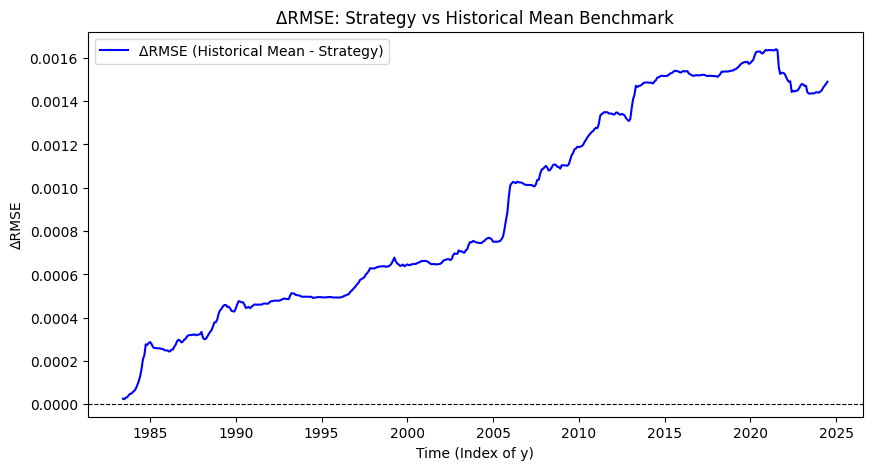

In [73]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# **Expanding Window 回归**
start_train = 100  # 初始训练数据量
fwd_ret_period=6
y=gc_data_new[f"GC1_{fwd_ret_period}M_Fwd_Ret"].dropna(how="all")
y_historical_mean_data=gc_data_new['GC1_Monthly_Excess_Return'].loc[y.index].dropna(how='all')


#shift_columns_gc2 = ["GC2_1M_Sign_lag_1", "GC2_3M_Sign_lag_1", "GC2_6M_Sign_lag_1", "GC2_12M_Sign_lag_1"]
shift_columns_gc2 = ["GC2_1M_Sign_lag_1", "GC2_3M_Sign_lag_2", "GC2_6M_Sign_lag_2", "GC2_12M_Sign_lag_2"]
#shift_columns_gc_all = ["GC1_1M_Sign_lag_1","GC2_1M_Sign_lag_1",'GC1_3M_Sign_lag_1','GC2_3M_Sign_lag_1','GC1_6M_Sign_lag_1','GC2_6M_Sign_lag_1','GC1_12M_Sign_lag_1','GC2_12M_Sign_lag_1']
shift_columns_gc_all = ["GC1_1M_Sign_lag_1","GC2_1M_Sign_lag_1",'GC1_3M_Sign_lag_2','GC2_3M_Sign_lag_2','GC1_6M_Sign_lag_2','GC2_6M_Sign_lag_2','GC1_12M_Sign_lag_2','GC2_12M_Sign_lag_2']

cols_to_merge = ['GC1_Monthly_Excess_Return', 'GC1_3M_Ret', 'GC1_6M_Ret', 'GC1_12M_Ret']

# 合并数据，使用索引进行连接（inner join）

#To do: 
# 1. Lets try shifting the return for 3M, 6M and 12M 
# 2. Let's try still using the sign first in another run 


x_variables_data = x_variables_data.drop(columns=shift_columns_gc_all, errors="ignore")
x_variables_data = x_variables_data.merge(gc_data_new[cols_to_merge].shift(1), left_index=True, right_index=True, how="left")

x_variables_data.head(20)

# LASSO Regularization
scaler = StandardScaler() #standarized by z score
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
n_obs = len(y)

# 记录 SSE 累计误差
SSE_model_cumsum = []
SSE_historical_cumsum = []
# 存储每个时间步的特征重要性
feature_importance_per_step = []
# 选择机器学习模型（可以切换）
# model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)  # XGBoost
model = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10,min_samples_split=5,max_features=0.6)  # 随机森林
# model = SVR(kernel='rbf')  # 支持向量回归
# 存储每个时间步的预测值、历史均值误差和真实值
results = []

# 存储模型的统计结果
model_summaries = []
for t in tqdm(range(start_train, n_obs - 1), desc=f"Processing"):
    # 使用当前时间 t 之前的所有数据进行训练
    X_train = X_scaled.iloc[:t]
    y_train = y.iloc[:t]
    y_historical_mean = y_historical_mean_data.iloc[:t]

    # 预测下一步 t+1
    X_test = X_scaled.iloc[t:t+1]
    y_test = y.iloc[t:t+1]

    # 仅保留 LASSO 选择的变量
    if len(selected_features) > 0:
        X_train_selected = X_train[selected_features]
        X_test_selected = X_test[selected_features]

        # 训练机器学习回归模型
        model.fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)[0]  # 获取单个预测值
        # 获取特征重要性
        if hasattr(model, "feature_importances_"):  # 适用于随机森林、XGBoost
            feature_importance = model.feature_importances_
        else:
            # 使用 statsmodels 重新拟合以获取系数
            X_train_sm = sm.add_constant(X_train_selected)
            ols_model = sm.OLS(y_train, X_train_sm).fit()
            feature_importance = ols_model.params[1:].values  # 跳过截距项

        # 记录当前时间步的特征重要性
        feature_importance_per_step.append(dict(zip(selected_features, feature_importance)))
        # 计算策略预测误差 f_t+1
        forecast_error = float(y_test - y_pred)
    else:
        # 如果 LASSO 没有选择任何变量，则使用历史均值进行预测
        forecast_error = float(y_test - y_historical_mean.mean() * data_period)

    # 计算历史均值预测误差 m_t+1
    historical_mean_error = float(y_test - y_historical_mean.mean() * data_period)

    # 累计 SSE（均方误差）
    if t == start_train:
        SSE_model_cumsum.append(forecast_error ** 2)
        SSE_historical_cumsum.append(historical_mean_error ** 2)
    else:
        SSE_model_cumsum.append(SSE_model_cumsum[-1] + forecast_error ** 2)
        SSE_historical_cumsum.append(SSE_historical_cumsum[-1] + historical_mean_error ** 2)
     # 记录当前时间步的结果
    results.append({
        "Date": y.index[t],
        "ret_real": float(y_test),
        "ret_pred": float(y_pred),
        "historical_mean": y_historical_mean.mean() * data_period
    })
results=pd.DataFrame(results)

# **计算 ΔRMSE 随时间的变化**
delta_RMSE_series = np.sqrt(np.array(SSE_historical_cumsum) / len(SSE_historical_cumsum) + 1) - \
                    np.sqrt(np.array(SSE_model_cumsum) / len(SSE_model_cumsum) + 1)
# **转换特征重要性 DataFrame**
df_feature_importance_per_step = pd.DataFrame(feature_importance_per_step)

# **计算特征在所有时间步的重要性均值**
df_feature_avg_importance = df_feature_importance_per_step.mean().reset_index()
df_feature_avg_importance.columns = ["Feature", "Avg Importance"]
# **计算模型的整体统计信息**
y_pred_all = model.predict(X_train_selected)

# 计算 R²、MSE、RMSE
r2 = r2_score(y_train, y_pred_all)
mse = mean_squared_error(y_train, y_pred_all)
rmse = np.sqrt(mse)

# 提取特征重要性
if hasattr(model, "feature_importances_"):
    feature_importance = dict(zip(X_train_selected.columns, model.feature_importances_))
elif isinstance(model, XGBRegressor):
    feature_importance = model.get_booster().get_score(importance_type='weight')
else:
    feature_importance = "N/A"

# 组织统计结果
model_summary = {
    "Model": type(model).__name__,
    "R-squared": r2,
    "MSE": mse,
    "RMSE": rmse,
    "Feature Importance": feature_importance
}

# 将统计结果转换为 DataFrame
df_model_summary = pd.DataFrame({
    "Metric": ["R-squared", "MSE", "RMSE"],
    "Value": [r2, mse, rmse]
})

# 显示表格
print(df_model_summary)

# **绘制 ΔRMSE**
plt.figure(figsize=(10, 5))
plt.plot(y.index[start_train:n_obs - 1], delta_RMSE_series, label="ΔRMSE (Historical Mean - Strategy)", color='blue')

plt.xlabel("Time (Index of y)")
plt.ylabel("ΔRMSE")
plt.title("ΔRMSE: Strategy vs Historical Mean Benchmark")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # 添加零基准线
plt.legend()
plt.show()
results
delta_RMSE_series
results['ret_real']/fwd_ret_period
results
#### WIP: Below is the code to compare strategy performance, it's not good to use yet, has some bugs
transaction_cost=[0,0.002,0.004,0.01]
benchmark_bp=0.002
results=pd.DataFrame(results)
# 设置时间索引
results.set_index("Date", inplace=True)
for tc in transaction_cost:
    # 计算策略回报
    results[f"strategy_return_{int(tc*1000)}bp"] = results["ret_real"]/fwd_ret_period * results["ret_pred"].apply(lambda x: 1 if x > 0 else -1)-tc
    results[f"cumulative_strategy_{int(tc*1000)}bp"] = np.exp(results[f"strategy_return_{int(tc*1000)}bp"].cumsum())


# 计算基准回报
results["benchmark_return"] = results["ret_real"]/fwd_ret_period * results["historical_mean"].apply(lambda x: 1 if x > 0 else -1)-benchmark_bp

# 计算买入持有回报
results["buy_and_hold_return"] = gc_data_new["GC1_Monthly_Excess_Return"].loc[results.index]

# 计算累积收益
results["cumulative_benchmark"] = np.exp(results["benchmark_return"].cumsum())
results["cumulative_buy_and_hold"] = np.exp(results["buy_and_hold_return"].cumsum())

# 绘制收益曲线
plt.figure(figsize=(10, 6))
for tc in transaction_cost:
    plt.plot(results.index, results[f"cumulative_strategy_{int(tc*1000)}bp"], label=f"Strategy Return_{int(tc*1000)}bp", linewidth=2)
plt.plot(results.index, results["cumulative_benchmark"], label=f"Benchmark Return_{int(benchmark_bp*1000)}bp", linestyle="--", linewidth=2)
plt.plot(results.index, results["cumulative_buy_and_hold"], label="Buy & Hold Return", linestyle=":", linewidth=4)

plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Trading Strategy vs Benchmark vs Buy & Hold (no short constraint)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()
# print(performance_metrics)
transaction_cost=[0,0.002,0.004,0.01]
benchmark_bp=0.002
results=pd.DataFrame(results)
# 设置时间索引
#results.set_index("Date", inplace=True)
for tc in transaction_cost:
    # 计算策略回报
    results[f"strategy_return_{int(tc*1000)}bp"] = (results["ret_real"]/fwd_ret_period * results["ret_pred"].apply(lambda x: 1 if x > 0 else 0)).apply(lambda x:x-tc if x!=0 else x)
    results[f"cumulative_strategy_{int(tc*1000)}bp"] = np.exp(results[f"strategy_return_{int(tc*1000)}bp"].cumsum())


# 计算基准回报
results["benchmark_return"] = results["ret_real"]/fwd_ret_period * results["historical_mean"].apply(lambda x: 1 if x > 0 else -1)-benchmark_bp

# 计算买入持有回报
results["buy_and_hold_return"] = gc_data_new["GC1_Monthly_Excess_Return"].loc[results.index]

# 计算累积收益
results["cumulative_benchmark"] = np.exp(results["benchmark_return"].cumsum())
results["cumulative_buy_and_hold"] = np.exp(results["buy_and_hold_return"].cumsum())


# 绘制收益曲线
plt.figure(figsize=(10, 6))
for tc in transaction_cost:
    plt.plot(results.index, results[f"cumulative_strategy_{int(tc*1000)}bp"], label=f"Strategy Return_{int(tc*1000)}bp", linewidth=2)
plt.plot(results.index, results["cumulative_benchmark"], label=f"Benchmark Return_{int(benchmark_bp*1000)}bp", linestyle="--", linewidth=2)
plt.plot(results.index, results["cumulative_buy_and_hold"], label="Buy & Hold Return", linestyle=":", linewidth=4)

plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Trading Strategy vs Benchmark vs Buy & Hold (long only)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()
# print(performance_metrics)
# 计算指标
performance_metrics = []

def calculate_sharpe_ratio(returns, risk_free_rate=0):
    """ 计算夏普率 """
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std() if excess_returns.std() != 0 else np.nan

def calculate_max_drawdown(cumulative_returns):
    """ 计算最大回撤 """
    peak = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

for tc in transaction_cost:
    col_name_return = f"strategy_return_{int(tc*1000)}bp"
    col_name_cum = f"cumulative_strategy_{int(tc*1000)}bp"

    final_net_value = results[col_name_cum].iloc[-1]
    annualized_return = results[col_name_return].mean() * 12
    sharpe_ratio = calculate_sharpe_ratio(results[col_name_return])
    max_drawdown = calculate_max_drawdown(results[col_name_cum])
    
    performance_metrics.append(["Strategy", f"{int(tc*1000)}bp", final_net_value, annualized_return, sharpe_ratio, max_drawdown])

# 计算基准策略的绩效
final_net_value_benchmark = results["cumulative_benchmark"].iloc[-1]
annualized_return_benchmark = results["benchmark_return"].mean() * 12
sharpe_ratio_benchmark = calculate_sharpe_ratio(results["benchmark_return"])
max_drawdown_benchmark = calculate_max_drawdown(results["cumulative_benchmark"])
performance_metrics.append(["Benchmark", f"{int(benchmark_bp*1000)}bp", final_net_value_benchmark, annualized_return_benchmark, sharpe_ratio_benchmark, max_drawdown_benchmark])

# 计算买入持有策略的绩效
final_net_value_bh = results["cumulative_buy_and_hold"].iloc[-1]
annualized_return_bh = results["buy_and_hold_return"].mean() * 12
sharpe_ratio_bh = calculate_sharpe_ratio(results["buy_and_hold_return"])
max_drawdown_bh = calculate_max_drawdown(results["cumulative_buy_and_hold"])
performance_metrics.append(["Buy & Hold", "-", final_net_value_bh, annualized_return_bh, sharpe_ratio_bh, max_drawdown_bh])

# 创建结果 DataFrame
performance_df = pd.DataFrame(performance_metrics, columns=["Strategy", "Transaction Cost", "Final Net Value", "Annualized Return", "Sharpe Ratio", "Max Drawdown"])

performance_df
